# Fantasy Hockey Points Modeling

## Objective
Winning my fantasy hockey league using statistics to my advantage. Using the player stats data from hockey reference (https://www.hockey-reference.com/), I can use the data to model with linear regression on an expected performance for the following year.

# Setup

## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import os
import math
from bs4 import BeautifulSoup
import requests

## Getting Data

First we'll take a peek into the directory and find the available files for reading into dataframes using the pandas library. We'll create a list of the files and loop through them to 

In [4]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'Fantasy Hockey Modeling.ipynb',
 'keeper_list.csv',
 'nhl-advanced-stats.csv',
 'nhl-stats-2010-goalies.csv',
 'nhl-stats-2010-skaters.csv',
 'nhl-stats-2011-goalies.csv',
 'nhl-stats-2011-skaters.csv',
 'nhl-stats-2012-goalies.csv',
 'nhl-stats-2012-skaters.csv',
 'nhl-stats-2013-goalies.csv',
 'nhl-stats-2013-skaters.csv',
 'nhl-stats-2014-goalies.csv',
 'nhl-stats-2014-skaters.csv',
 'nhl-stats-2015-goalies.csv',
 'nhl-stats-2015-skaters.csv',
 'nhl-stats-2016-goalies.csv',
 'nhl-stats-2016-skaters.csv',
 'nhl-stats-2017-goalies.csv',
 'nhl-stats-2017-skaters.csv',
 'nhl-stats-2018-goalies.csv',
 'nhl-stats-2018-skaters.csv',
 'nhl-stats-2019-goalies.csv',
 'nhl-stats-2019-skaters.csv',
 'README.md']

In [5]:
skater_csvs = [x for x in os.listdir() if 'skaters' in x]
goalie_csvs = [x for x in os.listdir() if 'goalie' in x]

Modifying the csv lists to exclude 2020 as the data is in a slightly different form and will be used as a result comparison.

In [91]:
skater_csvs = [x for x in skater_csvs if '2020' not in x]
goalie_csvs = [x for x in goalie_csvs if '2020' not in x]

## Consolidating and Pre-processing Data
Data is housed in multiple csv files for each season. Consolidating the nhl stats files from over the years for both skaters and goalies. Because skaters and goalies inherently have  have different stats categories, they need to be separated into independent datasets.

Reviewing the data acquired from the csvs, the data types are already in the appropriate types needed for additional manipulation. Only column names were reformatted otherwise, no further actions are required.

In [6]:
df = pd.read_csv(skater_csvs[0],header=1)
display(df)
df.info()

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,GWG,G.1,A.1,G.2,A.2,Hits,BS
0,Corey Perry,MON,RW,82,50,48,98,9,104,290,11,14,17,4,1,64,41
1,Steven Stamkos,TB,C,82,45,46,91,3,74,272,8,17,19,0,0,84,37
2,Jarome Iginla,FA,RW,82,43,43,86,0,40,289,6,14,16,0,0,103,28
3,Ryan Kesler,ANH,C,82,41,32,73,24,66,260,7,15,15,3,1,124,80
4,Daniel Sedin,FA,LW,82,41,63,104,30,32,266,10,18,24,0,0,13,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Matt Walker,PHI,D,4,0,0,0,0,4,3,0,0,0,0,0,5,5
887,Kris Newbury,FA,C,11,0,1,1,-1,35,6,0,0,0,0,0,19,1
888,Nolan Yonkman,CGY,D,16,0,1,1,5,39,8,0,0,0,0,0,41,11
889,Dave Scatchard,FA,C,8,0,1,1,1,6,6,0,0,0,0,0,7,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  891 non-null    object
 1   Team         891 non-null    object
 2   Pos          891 non-null    object
 3   Games        891 non-null    int64 
 4   G            891 non-null    int64 
 5   A            891 non-null    int64 
 6   Pts          891 non-null    int64 
 7   +/-          891 non-null    int64 
 8   PIM          891 non-null    int64 
 9   SOG          891 non-null    int64 
 10  GWG          891 non-null    int64 
 11  G.1          891 non-null    int64 
 12  A.1          891 non-null    int64 
 13  G.2          891 non-null    int64 
 14  A.2          891 non-null    int64 
 15  Hits         891 non-null    int64 
 16  BS           891 non-null    int64 
dtypes: int64(14), object(3)
memory usage: 118.5+ KB


In [7]:
df_skaters = pd.DataFrame()
for csv in skater_csvs:
    df_temp = pd.read_csv(csv,header=1)
    df_temp['Year'] = csv.split('-')[2]
    df_skaters = pd.concat([df_skaters,df_temp])
df_skaters.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_skaters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858 entries, 0 to 882
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Player Name  8858 non-null   object
 1   Team         8858 non-null   object
 2   Pos          8858 non-null   object
 3   Games        8858 non-null   int64 
 4   G            8858 non-null   int64 
 5   A            8858 non-null   int64 
 6   Pts          8858 non-null   int64 
 7   +/-          8858 non-null   int64 
 8   PIM          8858 non-null   int64 
 9   SOG          8858 non-null   int64 
 10  GWG          8858 non-null   int64 
 11  PPG          8858 non-null   int64 
 12  PPA          8858 non-null   int64 
 13  SHG          8858 non-null   int64 
 14  SHA          8858 non-null   int64 
 15  Hits         8858 non-null   int64 
 16  BS           8858 non-null   int64 
 17  Year         8858 non-null   object
dtypes: int64(14), object(4)
memory usage: 1.3+ MB


In [8]:
df_goalies = pd.DataFrame()
for csv in goalie_csvs:
    df_temp = pd.read_csv(csv,header=1)
    df_temp['Year'] = csv.split('-')[2]
    df_goalies = pd.concat([df_goalies,df_temp])
df_goalies

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,SV%,SO,MIN,Year
0,Roberto Luongo,FA,60,38,15,7,2.1,126,"1,753","1,627",0.928,4,"3,590",2010
1,Carey Price,MON,72,38,28,6,2.4,165,"2,147","1,982",0.923,8,"4,206",2010
2,Jimmy Howard,FA,63,37,17,5,2.8,168,"1,830","1,662",0.908,2,"3,615",2010
3,Miikka Kiprusoff,FA,71,37,24,6,2.6,182,"1,935","1,753",0.906,6,"4,156",2010
4,Cam Ward,FA,74,37,26,10,2.6,184,"2,375","2,191",0.923,4,"4,318",2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,0.857,0,8,2019
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,0.857,0,27,2019
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,0.943,0,59,2019
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,0.797,0,165,2019


# Scoring Criteria

This is the where you can enter your fantasy league scoring rubric. Depending on the weight of the various statistics, will impact the overall weighting of the projected stats that we'll be forecasting.

The following are the scoring criteria in my Yahoo Fantasy Hockey league

In [9]:
skater_scoring_criteria = {
    'G': 30,
    'A': 25,
    '+/-': 5,
    'PIM': 1,
    'PPG': 5,
    'PPA': 5,
    'SHG': 10,
    'SHA': 10,
    'GWG': 5,
    'SOG': 1.5,
    'FW': 1,
    'FL': -1,
    'Hits': 1,
    'BS': 1
}
goalie_scoring_criteria = {
    'W': 35,
    'GA': -15,
    'SV': 2.5,
    'SO': 25
}

# Evaluating Players

The following are functions to calculate fantasy value of each individual player as per the scoring criteria of my league outlined above.

In the evaluation, we'll be taking a look at both the absolute statistics and per game statistics as injuries reducing games played in a season can significantly impact the overall performance of a star player. That said, smaller sample sizes can skew performance for players that don't usually play the full 82 game season. In general, reviewing both will allow us to assess the trade-offs of performance over time vs impaired performance due to injuries in a particular season.

In [10]:
forward_positions = {'RW','LW','C'}
def categorize_skater_position(x):
    """ Recategorizing the player positions from RW, LW, C into forwards (F) or defense (D)."""
    if x in forward_positions:
        return 'F'
    else:
        return 'D'

In [11]:
def calc_skater_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate fantasy points from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[k]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts

def calc_skater_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate fantasy points per game from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[f"{k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts

In [12]:
def calc_skater_projected_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts
def calc_skater_projected_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points per game from the skaters' performance statistics."""
    fpts = 0
    for k,v in skater_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts

In [13]:
def calc_goalie_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate fantasy points from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[k]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts
def calc_goalie_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate fantasy points per game from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[f"{k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts*x['Games']/70

In [14]:
def calc_goalie_projected_fantasy_points(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts
def calc_goalie_projected_fantasy_points_per_game(x):
    """Uses the scoring criteria outlined above to calculate projected fantasy points per game from the goalies' performance statistics."""
    fpts = 0
    for k,v in goalie_scoring_criteria.items():
        try:
            fpts += x[f"Projected {k}/GP"]*v
        except:
            pass
#             print(f'Could not find {k} in the data.')
    return fpts*x['Games']/70

Fantasy Points applied to player data.

In [15]:
df_skaters['Fantasy Points'] = df_skaters.apply(calc_skater_fantasy_points,axis=1)
df_skaters

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,Hits,BS,Year,Fantasy Points
0,Corey Perry,MON,RW,82,50,48,98,9,104,290,11,14,17,4,1,64,41,2010,3649.0
1,Steven Stamkos,TB,C,82,45,46,91,3,74,272,8,17,19,0,0,84,37,2010,3338.0
2,Jarome Iginla,FA,RW,82,43,43,86,0,40,289,6,14,16,0,0,103,28,2010,3149.5
3,Ryan Kesler,ANH,C,82,41,32,73,24,66,260,7,15,15,3,1,124,80,2010,3035.0
4,Daniel Sedin,FA,LW,82,41,63,104,30,32,266,10,18,24,0,0,13,12,2010,3671.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,0,0,0,0,0,151,53,2019,403.5
879,Jean-Christophe Beaudin,OTT,C,22,0,1,1,-4,7,18,0,0,0,0,0,51,11,2019,101.0
880,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,0,0,0,0,0,5,0,2019,6.5
881,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,0,0,0,0,0,5,5,2019,41.5


In [16]:
df_skaters[df_skaters['Player Name']=='Alex Killorn']

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,GWG,PPG,PPA,SHG,SHA,Hits,BS,Year,Fantasy Points
218,Alex Killorn,TB,C,38,7,12,19,-6,14,82,2,1,2,0,0,40,22,2012,704.0
130,Alex Killorn,TB,C,82,17,24,41,8,63,173,2,3,5,0,0,77,31,2013,1630.5
152,Alex Killorn,TB,C,71,15,23,38,8,36,130,5,1,2,1,0,60,21,2014,1427.0
169,Alex Killorn,TB,C,81,14,26,40,14,44,154,3,3,3,0,1,76,23,2015,1569.0
96,Alex Killorn,TB,C,81,19,17,36,-9,66,176,4,4,6,1,1,99,25,2016,1494.0
177,Alex Killorn,TB,C,82,15,32,47,22,45,156,1,2,7,0,0,82,25,2017,1796.0
134,Alex Killorn,TB,C,82,18,22,40,22,45,153,2,2,3,1,1,88,23,2018,1640.5
32,Alex Killorn,TB,C,68,26,23,49,19,20,130,7,8,5,0,0,59,15,2019,1839.0


In [17]:
df_skaters.groupby(['Player Name','Year']).sum()

Games   G   A  Pts  +/-  PIM  SOG  GWG  PPG  PPA  SHG  \
Player Name       Year                                                          
A.J. Greer        2016      5   0   1    1   -2    4    8    0    0    0    0   
                  2017     17   0   3    3    2   29   13    0    0    0    0   
                  2018     15   1   1    2   -2   14    9    0    0    0    0   
Aaron Ekblad      2014     81  12  27   39   12   32  170    4    6    7    0   
                  2015     78  15  21   36   18   41  182    4    3    6    0   
...                       ...  ..  ..  ...  ...  ...  ...  ...  ...  ...  ...   
Zemgus Girgensons 2019     69  12   7   19   -1   10   85    1    0    0    1   
Zenon Konopka     2010     82   2   7    9  -14  307   56    0    0    0    0   
                  2011     55   3   2    5   -4  193   34    1    1    0    0   
                  2012     37   0   0    0   -4  117   18    0    0    0    0   
                  2013     59   1   2    3   -9   88   21    0    0    0    0   

                        SHA  Hits  BS  Fantasy Points  
Player Name       Year                                 
A.J. Greer        2016    0     4   3            38.0  
                  2017    0    30   5           168.5  
                  2018    0    20   5            97.5  
Aaron Ekblad      2014    0   109  80          1656.0  
                  2015    0    87  59          1590.0  
...                     ...   ...  ..             ...  
Zemgus Girgensons 2019    0   110  20           812.5  
Zenon Konopka     2010    0   110  52           718.0  
                  2011    0    54  18           446.0  
                  2012    0    23   9           156.0  
                  2013    0    46  26           226.5  

[8857 rows x 15 columns]

In [18]:
df_goalies['SA'] = df_goalies['SA'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['SV'] = df_goalies['SV'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['MIN'] = df_goalies['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['Year'] = df_goalies['Year'].apply(lambda x: int(re.sub(',','',x)))
df_goalies['Fantasy Points'] = df_goalies.apply(calc_goalie_fantasy_points,axis=1)
df_goalies

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,SV%,SO,MIN,Year,Fantasy Points
0,Roberto Luongo,FA,60,38,15,7,2.1,126,1753,1627,0.928,4,3590,2010,3607.5
1,Carey Price,MON,72,38,28,6,2.4,165,2147,1982,0.923,8,4206,2010,4010.0
2,Jimmy Howard,FA,63,37,17,5,2.8,168,1830,1662,0.908,2,3615,2010,2980.0
3,Miikka Kiprusoff,FA,71,37,24,6,2.6,182,1935,1753,0.906,6,4156,2010,3097.5
4,Cam Ward,FA,74,37,26,10,2.6,184,2375,2191,0.923,4,4318,2010,4112.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,0.857,0,8,2019,0.0
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,0.857,0,27,2019,0.0
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,0.943,0,59,2019,52.5
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,0.797,0,165,2019,-77.5


In [19]:
df_goalies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 85
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player Name     907 non-null    object 
 1   Team            907 non-null    object 
 2   Games           907 non-null    int64  
 3   W               907 non-null    int64  
 4   L               907 non-null    int64  
 5   OTL             907 non-null    int64  
 6   GAA             907 non-null    float64
 7   GA              907 non-null    int64  
 8   SA              907 non-null    int64  
 9   SV              907 non-null    int64  
 10  SV%             907 non-null    float64
 11  SO              907 non-null    int64  
 12  MIN             907 non-null    int64  
 13  Year            907 non-null    int64  
 14  Fantasy Points  907 non-null    float64
dtypes: float64(3), int64(10), object(2)
memory usage: 113.4+ KB


## Advanced Stats

In an attempt to gather more information regarding performance, I've included an additional dataset which includes advanced statistics.

The advanced stats adds the following information into the mix:
* CF
* CA
* CF%
* CF% rel
* FF
* FA
* FF%
* FF% rel
* oiSH%
* oiSV%
* PDO
* oZS%
* dZS%
* TOI/60
* TOI(EV)
* TK
* GV
* E+/-
* SAtt.
* Thru%

In [20]:
df_advanced_stats = pd.read_csv('nhl-advanced-stats.csv')
df_advanced_stats['Player Name'] = df_advanced_stats['Player'].apply(lambda x: x.split('\\')[0])
df_advanced_stats['Player ID'] = df_advanced_stats['Player'].apply(lambda x: x.split('\\')[1])
df_advanced_stats

,Rk,Player,Age,Tm,Pos,GP,CF,CA,CF%,CF% rel,...,dZS%,TOI/60,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,Player Name,Player ID
0,1,Justin Abdelkader\abdelju01,32,DET,LW,49,348,439,44.2,-1.9,...,56.7,11:32,9:48,10,18,-5.2,76,52.6,Justin Abdelkader,abdelju01
1,2,Pontus Aberg\abergpo01,26,TOR,LW,5,31,50,38.3,-18.2,...,40.0,8:42,8:42,1,2,-0.8,5,80.0,Pontus Aberg,abergpo01
2,3,Vitaly Abramov\abramvi01,21,OTT,RW,2,11,17,39.3,-14.7,...,66.7,5:47,5:47,0,1,-0.3,4,75.0,Vitaly Abramov,abramvi01
3,4,Noel Acciari\acciano01,28,FLA,C,66,790,894,46.9,-3.5,...,61.4,15:57,13:08,32,21,-6.3,189,57.1,Noel Acciari,acciano01
4,5,Andrew Agozzino\agozzan01,29,TOT,LW,22,127,104,55.0,8.0,...,46.6,7:21,6:49,5,4,-0.6,18,55.6,Andrew Agozzino,agozzan01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,879,Travis Zajac\zajactr01,34,NJD,C,69,833,978,46.0,0.2,...,54.8,17:06,13:26,36,17,-6.1,124,58.9,Travis Zajac,zajactr01
879,880,Mika Zibanejad\zibanmi01,26,NYR,C,57,853,843,50.3,4.5,...,50.2,21:38,15:17,42,43,-0.1,350,59.4,Mika Zibanejad,zibanmi01
880,881,Mats Zuccarello\zuccama01,32,MIN,LW,65,766,825,48.1,-2.2,...,45.4,15:56,13:16,33,17,2.0,164,58.5,Mats Zuccarello,zuccama01
881,882,Jason Zucker\zuckeja01,28,TOT,LW,60,775,776,50.0,0.3,...,45.9,16:19,13:45,31,25,2.6,173,64.2,Jason Zucker,zuckeja01


In [21]:
df_advanced_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           883 non-null    int64  
 1   Player       883 non-null    object 
 2   Age          883 non-null    int64  
 3   Tm           883 non-null    object 
 4   Pos          883 non-null    object 
 5   GP           883 non-null    int64  
 6   CF           883 non-null    int64  
 7   CA           883 non-null    int64  
 8   CF%          883 non-null    float64
 9   CF% rel      883 non-null    float64
 10  FF           883 non-null    int64  
 11  FA           883 non-null    int64  
 12  FF%          883 non-null    float64
 13  FF% rel      883 non-null    float64
 14  oiSH%        879 non-null    float64
 15  oiSV%        882 non-null    float64
 16  PDO          878 non-null    float64
 17  oZS%         882 non-null    float64
 18  dZS%         882 non-null    float64
 19  TOI/60  

## Linear Regression

Using the various features (stats), we'll use linear regression to estimate the future performance. In this analysis, I'm looking to estimate and forecast the performance of the 2020 season.

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, confusion_matrix
from sklearn.feature_selection import f_regression

### Using Past Performance to Forecast
The method in which I'm using to forecast future performance is taking past performance and using a linear regression model by incrementing the year.

The features that will be used to create the model are as follows:

In [23]:
factors = ['Games','G','A','+/-','PIM','SOG','GWG','PPG','PPA','SHG','SHA','Hits','BS']
pg_factors = ['G','A','+/-','PIM','SOG','GWG','PPG','PPA','SHG','SHA','Hits','BS']
advanced_factors = ['Age','CF','CA','CF%','CF% rel','FF','FA','FF%','FF% rel','oiSH%','oiSV%','PDO','oZS%','dZS%','TOI/60s','TOI(EV)s','TK','GV','E+/-','SAtt.','Thru%']
goalie_factors = ['Games','W','L','OTL','GAA','GA','SA','SV','SV%','SO','MIN']
goalie_pg_factors = ['W','L','OTL','GAA','GA','SA','SV','SV%','SO','MIN']

#### Skaters
Consolidating the data from the past 2 years (2018 and 2019) of performance into a single dataframe that we will the SciKit package to execute a linear regression training model to predict 2020 performance

In [24]:
df_2018 = pd.read_csv('nhl-stats-2018-skaters.csv',header=1)
df_2018.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2018['Fantasy Points'] = df_2018.apply(calc_skater_fantasy_points,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-skaters.csv',header=1)
df_2019.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2019['Fantasy Points'] = df_2019.apply(calc_skater_fantasy_points,axis=1)
df_skaters_merge = df_2018.merge(df_2019, on='Player Name', how='inner')

In [25]:
df_skaters_merge

,Player Name,Team_x,Pos_x,Games_x,G_x,A_x,Pts_x,+/-_x,PIM_x,SOG_x,...,PIM_y,SOG_y,GWG_y,PPG_y,PPA_y,SHG_y,SHA_y,Hits_y,BS_y,Fantasy Points_y
0,Alex Ovechkin,WAS,LW,81,51,38,89,7,40,338,...,30,311,3,13,5,0,0,184,30,2670.5
1,Leon Draisaitl,EDM,C,82,50,55,105,2,52,231,...,18,218,10,16,28,0,0,27,19,3591.0
2,John Tavares,TOR,C,82,47,41,88,19,34,286,...,24,197,4,7,14,0,0,32,31,2102.5
3,Steven Stamkos,TB,C,82,45,53,98,4,37,234,...,22,176,6,10,9,0,0,69,38,2383.0
4,Patrick Kane,CHI,RW,81,44,66,110,2,22,341,...,40,275,2,8,15,0,0,24,19,2925.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,Kole Sherwood,CLS,C,2,0,0,0,0,0,2,...,2,6,0,0,0,0,0,10,1,22.0
736,Dan Hamhuis,FA,D,57,0,5,5,-2,28,39,...,35,44,0,0,0,0,0,64,53,448.0
737,Karl Alzner,FA,D,9,0,1,1,1,2,8,...,0,4,0,0,0,0,0,1,4,6.0
738,Dylan McIlrath,DET,D,7,0,0,0,2,4,6,...,23,14,0,0,0,0,0,48,12,84.0


Creating the linear regression model.

The linear regression model is generating a model for every available factor included. The models for each feature are saved into a dictionary which will be used later.

In [26]:
models = {}
for factor in factors:
    y = df_skaters_merge[f"{factor}_y"]
    X = df_skaters_merge[['Games_x','G_x','A_x','+/-_x','PIM_x','SOG_x','GWG_x','PPG_x','PPA_x','SHG_x','SHA_x','Hits_x','BS_x']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

Based on the models created above, a dataframe here is created to project the stats of the players of 2019.

In [27]:
df_yty = df_2019
for factor in factors:
    df_yty[f"Projected {factor}"] = models[factor].predict(df_yty[factors])
df_yty['Projected Fantasy Points'] = df_yty.apply(calc_skater_projected_fantasy_points,axis=1)
df_yty['Position'] = df_yty['Pos'].apply(lambda x: categorize_skater_position(x))
df_yty

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,...,Projected SOG,Projected GWG,Projected PPG,Projected PPA,Projected SHG,Projected SHA,Projected Hits,Projected BS,Projected Fantasy Points,Position
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,261.484702,5.537403,10.992536,6.135898,0.431250,-0.091870,152.772871,24.580799,2429.917524,F
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,236.066938,5.320872,12.318890,14.264431,-0.443057,-0.030804,49.018449,24.223212,2657.624830,F
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,253.234852,5.247884,10.360360,11.707329,0.002404,0.012064,41.015734,48.229210,2539.802781,F
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,181.009345,4.720437,10.334807,20.238487,-0.299624,0.011392,27.429421,13.662547,2610.476471,F
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,174.589783,4.473360,9.349582,9.492456,0.519959,0.870421,45.030382,40.519659,2016.141700,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,43.008661,0.275517,-0.356812,-0.210474,0.225722,0.322965,117.268201,46.462269,434.806775,D
879,Jean-Christophe Beaudin,OTT,C,22,0,1,1,-4,7,18,...,32.889748,0.330067,0.218754,0.377438,0.145942,0.107147,54.401655,19.229314,305.602691,F
880,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,27.673195,0.352717,0.515551,0.746831,0.049213,0.042297,26.294078,14.019256,261.852520,D
881,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,27.069623,0.349845,0.554427,0.870244,0.023605,0.064005,26.400847,18.032087,274.307685,D


Based on the linear regression models, the following is a comparison of 2019 performance to gauge overall error in the linear regression model.

In [28]:
df_yty[['Player Name','Fantasy Points','Projected Fantasy Points']].sort_values(by=['Projected Fantasy Points'],ascending=False)

,Player Name,Fantasy Points,Projected Fantasy Points
8,Nathan MacKinnon,3311.0,2728.255653
1,David Pastrnak,3487.5,2657.624830
3,Leon Draisaitl,3591.0,2610.476471
9,Connor McDavid,3211.0,2558.678814
2,Auston Matthews,3023.0,2539.802781
...,...,...,...
799,Lawrence Pilut,22.0,252.951950
831,Timothy Liljegren,23.0,249.189620
721,Brian Gibbons,-1.5,246.945103
846,Tobias Bjornfot,-20.0,246.122756


The results between forecasted and actual fantasy points plotted on a scatterplot are as follows. As you can see, the model overestimates players with a low number of actual fantasy points and underestimates player performance at the upper end of the spectrum. That said, the forecasting is still quite tight in terms of clustering and could potentially still work decently in terms of estimating relative performance for future years.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


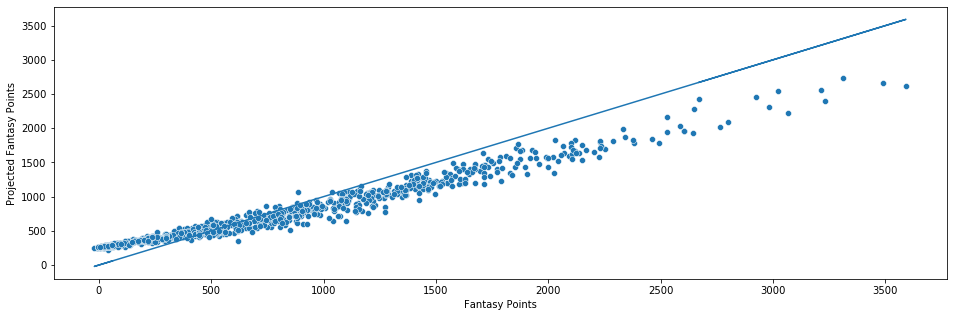

In [29]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_yty['Fantasy Points'],df_yty['Projected Fantasy Points'])
plt.plot(df_yty['Fantasy Points'],df_yty['Fantasy Points'])

Below is the relationship between how the projected fantasy point data relates to the actual fantasy points acquired for 2019 with respect to the rankings of the NHL players in the dataset. The "index" is being used as a ranking reference and indicates how the variations compared to how each of the players were ranked as per their overall Fantasy Point Production for the 2019 season.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


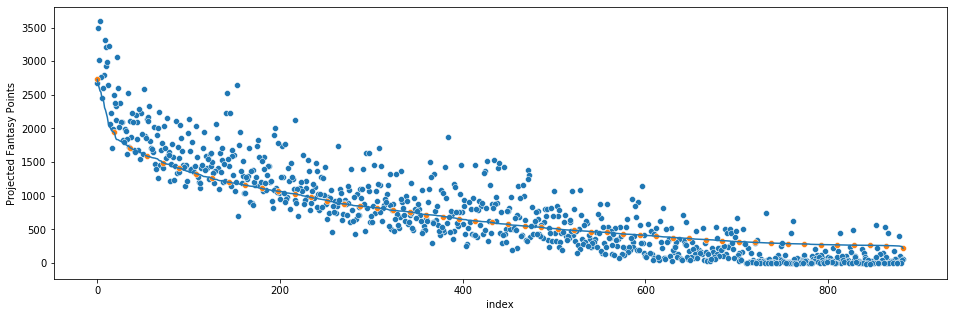

In [30]:
df_plot = df_yty.copy().sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)
sns.scatterplot(df_plot['index'],'Fantasy Points',data=df_plot)
sns.scatterplot(df_plot.loc[df_plot.index.values%18==0].index.values, df_plot['Projected Fantasy Points'].loc[df_plot.index.values%18==0])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


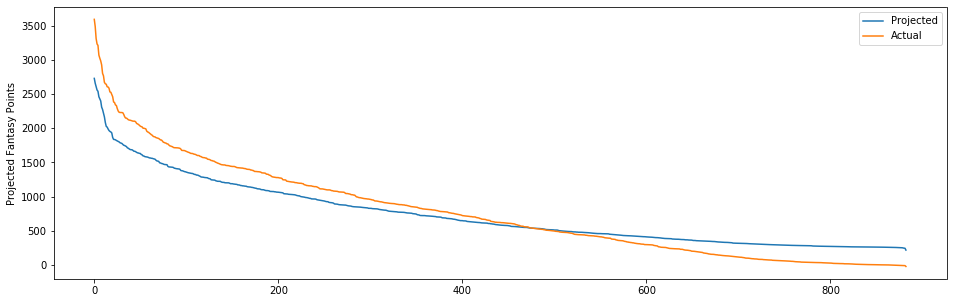

In [31]:
df_plot = df_yty.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
df_plot2 = df_yty.sort_values(by='Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy Points',data=df_plot2,label='Actual')

#### Goalies
Consolidating the data from the past 2 years of performance into a single dataframe that we will the SciKit package to execute a linear regression training model.

In [32]:
df_2018 = pd.read_csv('nhl-stats-2018-goalies.csv',header=1)
df_2018['SA'] = df_2018['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2018['SV'] = df_2018['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2018['MIN'] = df_2018['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_2018['Fantasy Points'] = df_2018.apply(calc_goalie_fantasy_points,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-goalies.csv',header=1)
df_2019['SA'] = df_2019['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2019['SV'] = df_2019['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2019['MIN'] = df_2019['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_2019['Fantasy Points'] = df_2019.apply(calc_goalie_fantasy_points,axis=1)
df_goalie_merge = df_2018.merge(df_2019, on='Player Name', how='inner')

In [33]:
df_goalie_merge

,Player Name,Team_x,Games_x,W_x,L_x,OTL_x,GAA_x,GA_x,SA_x,SV_x,...,L_y,OTL_y,GAA_y,GA_y,SA_y,SV_y,SV%_y,SO_y,MIN_y,Fantasy Points_y
0,Andrei Vasilevskiy,TB,53,39,10,4,2.4,128,1713,1585,...,14,3,2.6,133,1605,1472,0.917,3,3122,2985.0
1,Sergei Bobrovsky,FLA,62,37,24,1,2.6,153,1756,1603,...,19,6,3.2,151,1505,1354,0.900,1,2806,1950.0
2,Martin Jones,SJ,62,36,19,5,3.0,176,1699,1523,...,21,2,3.0,118,1139,1021,0.896,2,2360,1427.5
3,Frederik Andersen,TOR,60,36,16,7,2.8,162,1958,1796,...,13,7,2.9,143,1577,1434,0.909,3,3007,2530.0
4,Marc-Andre Fleury,VGK,61,35,21,5,2.5,152,1745,1593,...,16,5,2.8,133,1399,1266,0.905,5,2880,2240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Tristan Jarry,PIT,2,0,1,1,3.5,7,62,55,...,12,1,2.4,78,985,907,0.921,3,1926,1872.5
68,Eric Comrie,WPG,1,0,1,0,5.1,5,28,23,...,2,0,4.3,9,66,57,0.864,0,126,7.5
69,Pavel Francouz,COL,2,0,2,0,2.0,2,35,33,...,7,4,2.4,77,996,919,0.923,1,1914,1902.5
70,Michael DiPietro,VAN,1,0,1,0,7.0,7,24,17,...,0,0,7.5,1,7,6,0.857,0,8,0.0


Creating the linear regression model.

The linear regression model is generating a model for every available factor included. The models for each feature are saved into a dictionary which will be used later.

In [34]:
models = {}
for factor in goalie_factors:
    y = df_goalie_merge[f"{factor}_y"]
    X = df_goalie_merge[[f"{f}_x" for f in goalie_factors]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

Based on the models created above, a dataframe here is created to project the stats of the goalies of 2019.

In [35]:
df_yty_goalie = df_2019
for factor in goalie_factors:
    df_yty_goalie[f"Projected {factor}"] = models[factor].predict(df_yty_goalie[goalie_factors])
df_yty_goalie['Projected Fantasy Points'] = df_yty_goalie.apply(calc_goalie_projected_fantasy_points,axis=1)
df_yty_goalie

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,...,Projected L,Projected OTL,Projected GAA,Projected GA,Projected SA,Projected SV,Projected SV%,Projected SO,Projected MIN,Projected Fantasy Points
0,Andrei Vasilevskiy,TB,52,35,14,3,2.6,133,1605,1472,...,17.349464,4.747370,3.134284,143.672559,1479.596727,1335.924167,0.898418,2.379138,2955.067531,2220.982179
1,Connor Hellebuyck,WPG,58,31,21,5,2.6,140,1796,1656,...,12.651749,3.672111,2.945150,96.237064,1144.881520,1048.644456,0.906846,1.592369,2238.923025,1903.916898
2,Jordan Binnington,STL,50,30,13,7,2.6,126,1430,1304,...,15.674505,4.268295,2.642141,125.728296,1367.191648,1241.463352,0.908871,2.859861,2727.196026,2171.951699
3,Frederik Andersen,TOR,52,29,13,7,2.9,143,1577,1434,...,15.185264,4.234778,2.768434,122.472801,1329.398911,1206.926109,0.911147,1.960046,2564.748468,2042.953831
4,Marc-Andre Fleury,VGK,49,27,16,5,2.8,133,1399,1266,...,15.867659,4.217788,2.845823,119.487464,1274.093709,1154.606245,0.902154,2.823888,2558.788010,1944.996809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,...,-1.848193,-5.027353,4.193500,-37.498249,-539.908025,-502.409776,0.846799,0.195645,-939.307860,-977.611817
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,...,2.837445,0.442531,4.080554,21.686051,235.122687,213.436635,0.883923,0.344545,459.198946,363.245310
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,...,6.038708,2.125651,2.198689,50.463426,598.194284,547.730857,0.915728,0.531285,1155.993332,998.146229
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,...,3.056111,0.149556,5.358662,17.074976,142.630677,125.555700,0.866745,0.282250,276.869943,119.593066


Based on the linear regression models, the following is a comparison of 2019 goalie performance to gauge overall error in the linear regression model.

In [36]:
df_yty_goalie[['Player Name','Fantasy Points','Projected Fantasy Points']].sort_values(by=['Projected Fantasy Points'],ascending=False)

,Player Name,Fantasy Points,Projected Fantasy Points
6,Tuukka Rask,2520.0,2289.274515
0,Andrei Vasilevskiy,2985.0,2220.982179
2,Jordan Binnington,2495.0,2171.951699
3,Frederik Andersen,2530.0,2042.953831
4,Marc-Andre Fleury,2240.0,1944.996809
...,...,...,...
84,Calvin Pickard,-77.5,119.593066
68,Jimmy Howard,432.5,-127.416224
80,Oscar Dansk,-12.5,-246.903620
78,Kasimir Kaskisuo,-10.0,-262.505653


Below is the relationship between how the projected fantasy point data relates to the actual fantasy points acquired for 2019 with respect to the rankings of the NHL goalies in the dataset. The "index" is being used as a ranking reference and indicates how the variations compared to how each of the goalies were ranked as per their overall Fantasy Point Production for the 2019 season.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


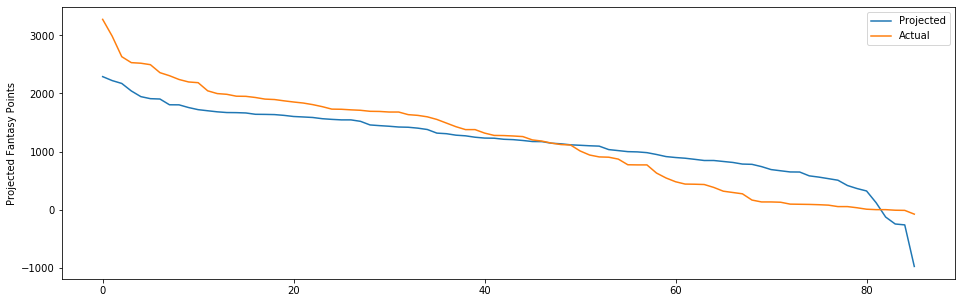

In [37]:
df_plot = df_yty_goalie.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
df_plot2 = df_yty_goalie.sort_values(by='Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy Points',data=df_plot2,label='Actual')

Findings:
* From the actual data, there appears to be a steep drop of in fantasy points acquired in the very high rankings. Indicating that there is a premium in terms of fantasy point production in the very top ranks of goalies
* The estimated fantasy points generally under estimate the higher ranked players and over estimate the lower end. It makes sense since the linear regression model aims to minimize the error of the entire data set.
* There is an inflection point where the model begins to overestimate player performance which we should be cognizant in the choice of draft picks towards the extremes.

### Using Advanced Stats

Advanced stats provide addtional information and categories for us to review how fantasy point production may be influenced by some alternative features. The following section will explore them.

In [38]:
df_2019 = pd.read_csv('nhl-stats-2019-skaters.csv',header=1)
df_2019_adv = df_2019.merge(df_advanced_stats, on='Player Name', how='inner')
df_2019_adv['Fantasy Points'] = df_2019_adv.apply(calc_skater_fantasy_points,axis=1)
df_2019_adv.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2019_adv['TOI/60s'] = df_2019_adv['TOI/60'].apply(lambda x: float(x.split(':')[1])+float(x.split(':')[0])*60)
df_2019_adv['TOI(EV)s'] = df_2019_adv['TOI(EV)'].apply(lambda x: float(x.split(':')[1])+float(x.split(':')[0])*60)
df_2019_adv.dropna(inplace=True)
df_2019_adv

,Player Name,Team,Pos_x,Games,G,A,Pts,+/-,PIM,SOG,...,TOI(EV),TK,GV,E+/-,SAtt.,Thru%,Player ID,Fantasy Points,TOI/60s,TOI(EV)s
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,15:39,28,48,2.1,561,55.4,ovechal01,2580.5,1239.0,939.0
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,15:03,49,88,8.5,506,55.1,pastrda01,3297.5,1138.0,903.0
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,17:32,78,48,15.5,504,57.5,matthau01,2898.0,1258.0,1052.0
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,17:37,60,91,-1.4,402,54.2,draisle01,3371.0,1357.0,1057.0
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,15:17,42,43,-0.1,350,59.4,zibanmi01,2581.0,1298.0,917.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,Kole Sherwood,CLS,C,3,0,0,0,0,2,6,...,6:38,2,0,0.3,6,100.0,sherwko01,22.0,398.0,398.0
852,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,13:52,13,20,6.7,90,45.6,lyubuil01,403.5,851.0,832.0
853,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,10:16,0,3,0.3,7,42.9,carlsga01,6.5,653.0,616.0
854,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,11:24,0,0,0.7,4,25.0,lindhan01,41.5,707.0,684.0


Creating the linear regression model.

The linear regression model is generating a model for every available advanced factor included. The models for each feature are saved into a dictionary which will be used later.

In [39]:
advanced_models = {}
all_factors = factors+advanced_factors
for factor in factors+advanced_factors:
    y = df_2019_adv[f"{factor}"]
    X = df_2019_adv[[x for x in all_factors if x != factor]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    advanced_models.setdefault(factor,lm)

In [40]:
for factor in all_factors:
    df_2019_adv[f"Projected {factor}"] = advanced_models[factor].predict(df_2019_adv[[x for x in all_factors if x != factor]])
df_2019_adv['Projected Fantasy Points'] = df_2019_adv.apply(calc_skater_projected_fantasy_points,axis=1)
df_2019_adv['Variance'] = df_2019_adv['Projected Fantasy Points'] - df_2019_adv['Fantasy Points']
df_2019_adv['Position'] = df_2019_adv['Pos_x'].apply(lambda x: categorize_skater_position(x))
df_2019_adv

,Player Name,Team,Pos_x,Games,G,A,Pts,+/-,PIM,SOG,...,Projected TOI/60s,Projected TOI(EV)s,Projected TK,Projected GV,Projected E+/-,Projected SAtt.,Projected Thru%,Projected Fantasy Points,Variance,Position
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,1222.496117,955.692189,31.044668,47.371972,4.018376,532.600580,52.905683,2471.966887,-108.533113,F
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,1212.090514,841.575766,48.198649,57.573452,9.429981,486.515851,50.148022,3497.200563,199.700563,F
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,1375.472984,972.349671,40.724468,57.836339,12.255498,505.905181,60.523090,3001.031380,103.031380,F
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,1420.802266,1009.643701,53.801488,76.818134,-4.047284,389.846669,48.670411,3455.586475,84.586475,F
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,1313.525513,900.869235,45.053209,41.773719,2.117853,352.323374,59.723354,2629.375639,48.375639,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851,Kole Sherwood,CLS,C,3,0,0,0,0,2,6,...,406.189347,435.049876,1.193503,-1.596544,0.938287,-7.364083,68.080701,-27.027414,-49.027414,F
852,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,906.196053,792.539930,10.502276,27.415256,0.593205,93.050135,51.019734,390.284153,-13.215847,D
853,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,639.898161,627.739368,1.106568,2.245079,-0.018334,11.879446,59.597824,-27.147935,-33.647935,D
854,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,739.982228,663.312013,0.033337,1.575358,-0.205810,17.033373,51.347465,35.261475,-6.238525,D


In [41]:
df_2019_adv[['Player Name','Fantasy Points','Projected Fantasy Points','Variance']].sort_values(by=['Projected Fantasy Points'],ascending=False)

,Player Name,Fantasy Points,Projected Fantasy Points,Variance
1,David Pastrnak,3297.5,3497.200563,199.700563
3,Leon Draisaitl,3371.0,3455.586475,84.586475
8,Nathan MacKinnon,3156.0,3179.921643,23.921643
9,Connor McDavid,2996.0,3134.689840,138.689840
2,Auston Matthews,2898.0,3001.031380,103.031380
...,...,...,...,...
758,Chase De Leo,2.5,-78.057413,-80.557413
761,Justin Bailey,5.5,-80.050987,-85.550987
824,Calvin Thurkauf,6.5,-91.932559,-98.432559
831,Jean-Sebastien Dea,3.0,-107.421677,-110.421677


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


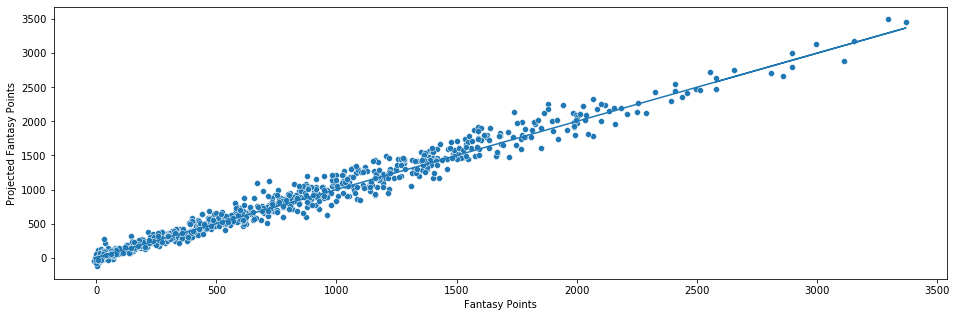

In [42]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_2019_adv['Fantasy Points'],df_2019_adv['Projected Fantasy Points'])
plt.plot(df_2019_adv['Fantasy Points'],df_2019_adv['Fantasy Points'])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


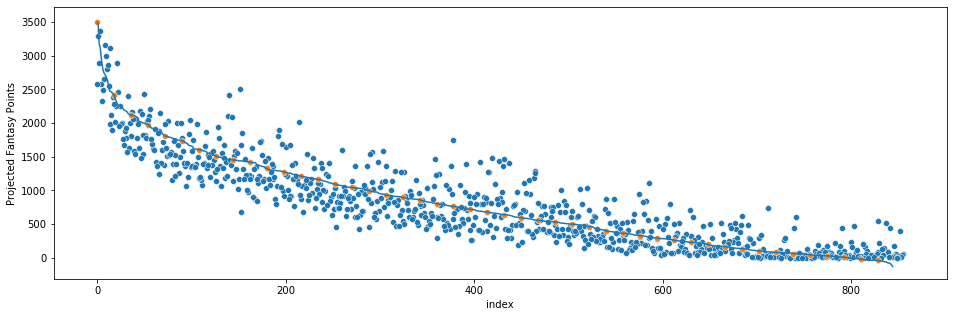

In [43]:
df_plot = df_2019_adv.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)
sns.scatterplot(df_plot['index'],'Fantasy Points',data=df_plot)
sns.scatterplot(df_plot.loc[df_plot.index.values%18==0].index.values, df_plot['Projected Fantasy Points'].loc[df_plot.index.values%18==0])

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


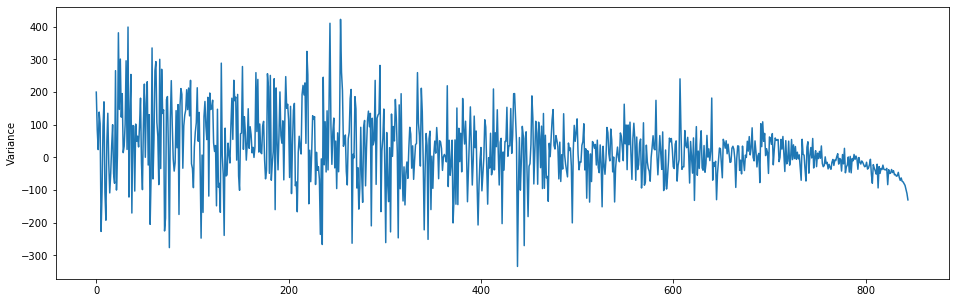

In [44]:
df_plot = df_2019_adv.sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Variance',data=df_plot)
# sns.scatterplot(df_plot['index'],'Fantasy Points',data=df_plot)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


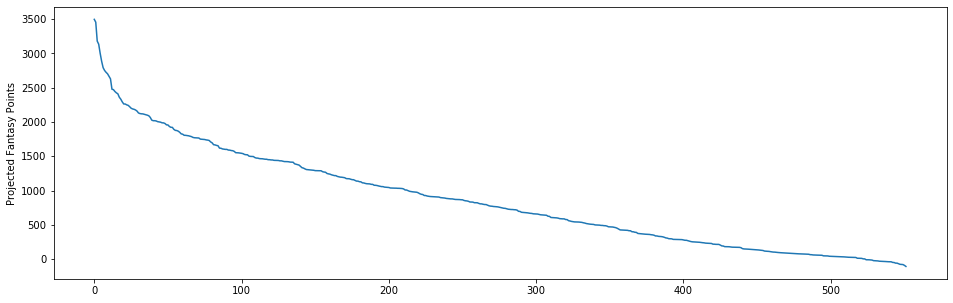

In [45]:
df_plot = df_2019_adv[df_2019_adv['Position']=='F'].sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=True)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


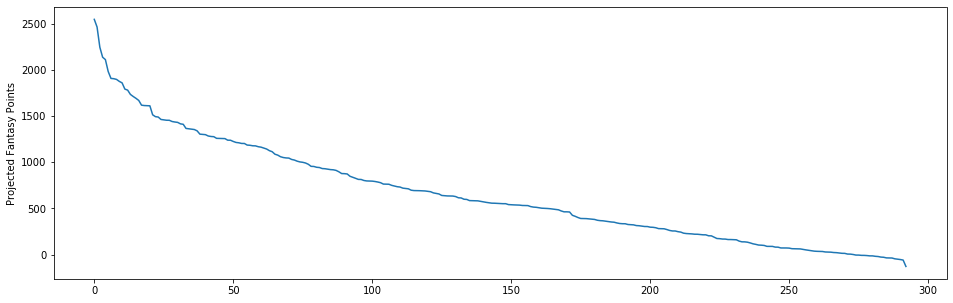

In [46]:
df_plot = df_2019_adv[df_2019_adv['Position']=='D'].sort_values(by='Projected Fantasy Points',ascending=False).reset_index(drop=True)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy Points',data=df_plot)

In [47]:
df_plot

,Player Name,Team,Pos_x,Games,G,A,Pts,+/-,PIM,SOG,...,Projected TOI/60s,Projected TOI(EV)s,Projected TK,Projected GV,Projected E+/-,Projected SAtt.,Projected Thru%,Projected Fantasy Points,Variance,Position
0,Roman Josi,NSH,D,69,16,49,65,22,41,260,...,1555.548132,1220.200711,41.932342,71.022511,12.867534,490.551397,55.959246,2546.040874,135.040874,D
1,John Carlson,WAS,D,69,15,60,75,12,26,189,...,1489.869278,1138.442987,49.335145,75.205638,5.952644,370.778128,49.334841,2463.046027,-49.453973,D
2,Alex Pietrangelo,VGK,D,70,16,36,52,11,20,225,...,1483.783378,1104.688561,34.265277,59.541234,6.374945,411.461326,51.580727,2244.332747,300.832747,D
3,Shea Theodore,VGK,D,71,13,33,46,12,25,219,...,1393.882948,1090.933414,42.543436,68.559774,17.617433,406.732876,41.732571,2136.303319,398.803319,D
4,Victor Hedman,TB,D,66,11,44,55,27,31,155,...,1395.206768,1130.167978,34.115957,59.801198,7.270785,299.146598,48.461084,2110.347010,95.847010,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,Trevor Carrick,SJ,D,3,0,0,0,0,5,1,...,295.166817,372.957054,1.073585,0.616182,0.160915,16.207288,58.401034,-45.736926,-53.236926,D
289,Kevin Connauton,FLA,D,4,0,0,0,-2,0,4,...,940.683944,815.173213,0.324961,1.646202,-1.074770,17.164901,47.552396,-49.401247,-57.401247,D
290,Gustav Olofsson,MON,D,3,0,0,0,-4,2,2,...,513.385098,467.685716,0.802345,1.222248,-1.117339,18.158310,58.199933,-53.700186,-45.700186,D
291,John Gilmour,FA,D,4,0,0,0,-2,0,5,...,1037.556789,879.563633,0.091372,5.328029,-1.159609,8.958826,49.041667,-59.266853,-62.766853,D


### Using Stats Per Game to Forecast

Understanding that the fantasy point production is directly related to the games played by each of the players, an injury or other circumstance that impacts the number of games played by a player/goalie will have a substantial impact in overall fantasy points. As a result, normalizing fantasy point production on a per game basis will be able to isolate this variable and potentially improve the estimation of fantasy points.

#### Skaters

In [48]:
df = pd.read_csv('nhl-stats-2018-skaters.csv',header=1)
df.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
for col in factors:
    df[f"{col}/GP"] = df[col]/df['Games']
df['Fantasy PPG'] = df.apply(calc_skater_fantasy_points_per_game,axis=1)

In [49]:
df_2018 = pd.read_csv('nhl-stats-2018-skaters.csv',header=1)
df_2018.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2018['Fantasy Points'] = df_2018.apply(calc_skater_fantasy_points,axis=1)
for col in factors:
    df_2018[f"{col}/GP"] = df_2018[col]/df_2018['Games']
df_2018['Fantasy PPG'] = df_2018.apply(calc_skater_fantasy_points_per_game,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-skaters.csv',header=1)
df_2019.rename(columns={'G.1':'PPG','A.1':'PPA','G.2':'SHG','A.2':'SHA'},inplace=True)
df_2019['Fantasy Points'] = df_2019.apply(calc_skater_fantasy_points,axis=1)
for col in factors:
    df_2019[f"{col}/GP"] = df_2019[col]/df_2019['Games']
df_2019['Fantasy PPG'] = df_2019.apply(calc_skater_fantasy_points_per_game,axis=1)
df_merge = df_2018.merge(df_2019, on='Player Name', how='inner')
df_merge

,Player Name,Team_x,Pos_x,Games_x,G_x,A_x,Pts_x,+/-_x,PIM_x,SOG_x,...,PIM/GP_y,SOG/GP_y,GWG/GP_y,PPG/GP_y,PPA/GP_y,SHG/GP_y,SHA/GP_y,Hits/GP_y,BS/GP_y,Fantasy PPG_y
0,Alex Ovechkin,WAS,LW,81,51,38,89,7,40,338,...,0.441176,4.573529,0.044118,0.191176,0.073529,0.0,0.000000,2.705882,0.441176,39.272059
1,Leon Draisaitl,EDM,C,82,50,55,105,2,52,231,...,0.253521,3.070423,0.140845,0.225352,0.394366,0.0,0.000000,0.380282,0.267606,50.577465
2,John Tavares,TOR,C,82,47,41,88,19,34,286,...,0.380952,3.126984,0.063492,0.111111,0.222222,0.0,0.000000,0.507937,0.492063,33.373016
3,Steven Stamkos,TB,C,82,45,53,98,4,37,234,...,0.385965,3.087719,0.105263,0.175439,0.157895,0.0,0.000000,1.210526,0.666667,41.807018
4,Patrick Kane,CHI,RW,81,44,66,110,2,22,341,...,0.571429,3.928571,0.028571,0.114286,0.214286,0.0,0.000000,0.342857,0.271429,41.792857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,Kole Sherwood,CLS,C,2,0,0,0,0,0,2,...,0.666667,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.333333,0.333333,7.333333
736,Dan Hamhuis,FA,D,57,0,5,5,-2,28,39,...,0.583333,0.733333,0.000000,0.000000,0.000000,0.0,0.000000,1.066667,0.883333,7.466667
737,Karl Alzner,FA,D,9,0,1,1,1,2,8,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,1.000000,1.500000
738,Dylan McIlrath,DET,D,7,0,0,0,2,4,6,...,1.437500,0.875000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000,0.750000,5.250000


In [50]:
models = {}
for factor in pg_factors:
    y = df_merge[f"{factor}/GP_y"]
#     X = df_merge[['Games_x','G_x','A_x','+/-_x','PIM_x','SOG_x','GWG_x','PPG_x','PPA_x','SHG_x','SHA_x','Hits_x','BS_x']]
    X = df_merge[[f"{f}/GP_x" for f in pg_factors]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

In [51]:
df_yty_pg_skaters = df_2019
for factor in pg_factors:
    df_yty_pg_skaters[f"Projected {factor}/GP"] = models[factor].predict(df_yty_pg_skaters[[f"{f}/GP" for f in pg_factors]])
# df_yty_pg_skaters['Projected Fantasy Points'] = df_yty_pg.apply(calc_skater_projected_fantasy_points,axis=1)
df_yty_pg_skaters['Projected Fantasy PPG'] = df_yty_pg_skaters.apply(calc_skater_projected_fantasy_points_per_game,axis=1)
df_yty_pg_skaters['Position'] = df_yty['Pos'].apply(lambda x: categorize_skater_position(x))
df_yty_pg_skaters

,Player Name,Team,Pos,Games,G,A,Pts,+/-,PIM,SOG,...,Projected SOG/GP,Projected GWG/GP,Projected PPG/GP,Projected PPA/GP,Projected SHG/GP,Projected SHA/GP,Projected Hits/GP,Projected BS/GP,Projected Fantasy PPG,Position
0,Alex Ovechkin,WAS,LW,68,48,19,67,-12,30,311,...,3.839110,0.076705,0.150560,0.094721,0.005418,-0.001084,2.370608,0.366146,34.360429,F
1,David Pastrnak,BOS,RW,70,48,47,95,21,40,279,...,3.889416,0.089757,0.201529,0.258748,-0.005272,-0.001468,0.653770,0.282481,44.418786,F
2,Auston Matthews,TOR,C,70,47,33,80,19,8,290,...,3.521754,0.065521,0.136640,0.180924,-0.000901,0.000018,0.621560,0.742656,34.302062,F
3,Leon Draisaitl,EDM,C,71,43,67,110,-7,18,218,...,3.438425,0.078169,0.173044,0.348932,-0.003709,-0.000680,0.359484,0.174546,44.074706,F
4,Mika Zibanejad,NYR,C,57,41,34,75,9,14,208,...,3.474467,0.087331,0.173572,0.208636,0.010955,0.016464,0.773373,0.638537,39.645158,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,Ilya Lyubushkin,ARI,D,51,0,4,4,4,18,41,...,0.965313,0.005204,-0.006221,-0.004206,0.003534,0.004952,2.429596,1.139390,8.945955,D
879,Jean-Christophe Beaudin,OTT,C,22,0,1,1,-4,7,18,...,0.995418,0.009294,-0.000137,-0.002805,0.004629,0.002826,2.044883,0.621635,8.787729,F
880,Gabriel Carlsson,CLS,D,6,0,0,0,-1,2,3,...,0.740691,0.008856,0.000226,0.001688,0.002575,0.000811,1.023102,0.169750,6.875401,D
881,Anton Lindholm,CHI,D,4,0,1,1,1,0,1,...,0.632513,0.002924,-0.009880,0.019472,0.000488,0.007114,1.100317,1.242347,8.157620,D


Applying a per game basis model, the multiplier will need to be multiplied by actual games played in order to estimate fantasy point production. Below is the comparison between actual fantasy points points per game and projected fantasy points per game.

In [52]:
df_yty_pg_skaters[['Player Name','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Projected Fantasy PPG',ascending=False)
# df_yty_pg_skaters[['Player Name','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Fantasy PPG',ascending=False)

,Player Name,Fantasy PPG,Projected Fantasy PPG
1,David Pastrnak,49.821429,44.418786
9,Connor McDavid,50.171875,44.085641
3,Leon Draisaitl,50.577465,44.074706
8,Nathan MacKinnon,47.985507,43.243588
4,Mika Zibanejad,48.526316,39.645158
...,...,...,...
710,Nikolai Knyzhov,1.666667,4.218412
764,Austin Poganski,0.000000,4.189105
711,German Rubtsov,1.125000,4.188493
843,Paul Carey,-4.000000,2.847017


Results show that there is an overestimation of points per game for players that have low Fantasy PPG and an underestimation of elite players with a high Fantasy PPG.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


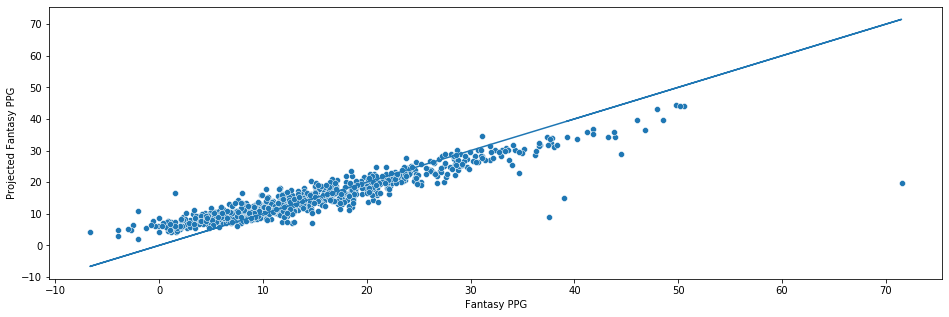

In [53]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_yty_pg_skaters['Fantasy PPG'],df_yty_pg_skaters['Projected Fantasy PPG'],data=df_yty_pg_skaters)
plt.plot(df_yty_pg_skaters['Fantasy PPG'],df_yty_pg_skaters['Fantasy PPG'])

Again, when comparing point production on a per game basis, there is a significant disparity in the point production as you move down the ranks. This can justify spending additional resources to acquire players that are in that category. It is quite drastic so this is only reserved for the most elite of elite players. As you move down the ranks, the variation between players are not as meaningful and likely will have less of an impact on overall selection.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


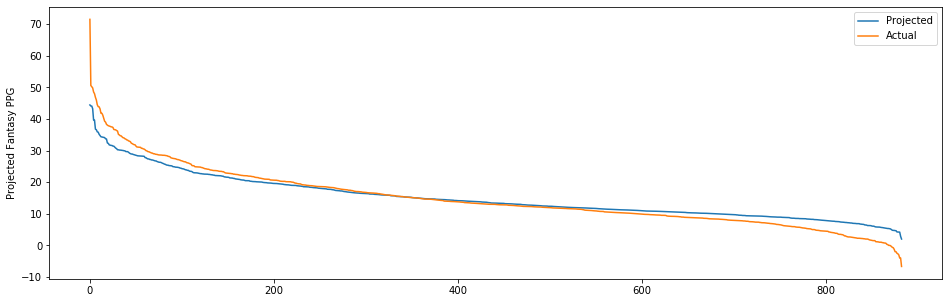

In [54]:
df_plot = df_yty_pg_skaters.copy().sort_values(by='Projected Fantasy PPG',ascending=False).reset_index(drop=False)
df_plot2 = df_yty_pg_skaters.copy().sort_values(by='Fantasy PPG',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy PPG',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy PPG',data=df_plot2,label='Actual')
plt.legend()

#### Goalies

In [55]:
df_2018 = pd.read_csv('nhl-stats-2018-goalies.csv',header=1)
df_2018['Fantasy Points'] = df_2018.apply(calc_skater_fantasy_points,axis=1)
df_2018['SA'] = df_2018['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2018['SV'] = df_2018['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2018['MIN'] = df_2018['MIN'].apply(lambda x: int(re.sub(',','',x)))
for col in goalie_pg_factors:
    df_2018[f"{col}/GP"] = df_2018[col]/df_2018['Games']
df_2018['Fantasy PPG'] = df_2018.apply(calc_goalie_fantasy_points_per_game,axis=1)
df_2019 = pd.read_csv('nhl-stats-2019-goalies.csv',header=1)
df_2019['SA'] = df_2019['SA'].apply(lambda x: int(re.sub(',','',x)))
df_2019['SV'] = df_2019['SV'].apply(lambda x: int(re.sub(',','',x)))
df_2019['MIN'] = df_2019['MIN'].apply(lambda x: int(re.sub(',','',x)))
df_2019['Fantasy Points'] = df_2019.apply(calc_goalie_fantasy_points,axis=1)
for col in goalie_pg_factors:
    df_2019[f"{col}/GP"] = df_2019[col]/df_2019['Games']
df_2019['Fantasy PPG'] = df_2019.apply(calc_goalie_fantasy_points_per_game,axis=1)
df_merge = df_2018.merge(df_2019, on='Player Name', how='inner')
df_merge

,Player Name,Team_x,Games_x,W_x,L_x,OTL_x,GAA_x,GA_x,SA_x,SV_x,...,L/GP_y,OTL/GP_y,GAA/GP_y,GA/GP_y,SA/GP_y,SV/GP_y,SV%/GP_y,SO/GP_y,MIN/GP_y,Fantasy PPG_y
0,Andrei Vasilevskiy,TB,53,39,10,4,2.4,128,1713,1585,...,0.269231,0.057692,0.050000,2.557692,30.865385,28.307692,0.017635,0.057692,60.038462,42.642857
1,Sergei Bobrovsky,FLA,62,37,24,1,2.6,153,1756,1603,...,0.380000,0.120000,0.064000,3.020000,30.100000,27.080000,0.018000,0.020000,56.120000,27.857143
2,Martin Jones,SJ,62,36,19,5,3.0,176,1699,1523,...,0.512195,0.048780,0.073171,2.878049,27.780488,24.902439,0.021854,0.048780,57.560976,20.392857
3,Frederik Andersen,TOR,60,36,16,7,2.8,162,1958,1796,...,0.250000,0.134615,0.055769,2.750000,30.326923,27.576923,0.017481,0.057692,57.826923,36.142857
4,Marc-Andre Fleury,VGK,61,35,21,5,2.5,152,1745,1593,...,0.326531,0.102041,0.057143,2.714286,28.551020,25.836735,0.018469,0.102041,58.775510,32.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Tristan Jarry,PIT,2,0,1,1,3.5,7,62,55,...,0.363636,0.030303,0.072727,2.363636,29.848485,27.484848,0.027909,0.090909,58.363636,26.750000
68,Eric Comrie,WPG,1,0,1,0,5.1,5,28,23,...,0.666667,0.000000,1.433333,3.000000,22.000000,19.000000,0.288000,0.000000,42.000000,0.107143
69,Pavel Francouz,COL,2,0,2,0,2.0,2,35,33,...,0.205882,0.117647,0.070588,2.264706,29.294118,27.029412,0.027147,0.029412,56.294118,27.178571
70,Michael DiPietro,VAN,1,0,1,0,7.0,7,24,17,...,0.000000,0.000000,7.500000,1.000000,7.000000,6.000000,0.857000,0.000000,8.000000,0.000000


In [56]:
models = {}
for factor in goalie_pg_factors:
    y = df_merge[f"{factor}/GP_y"]
#     X = df_merge[['Games_x','G_x','A_x','+/-_x','PIM_x','SOG_x','GWG_x','PPG_x','PPA_x','SHG_x','SHA_x','Hits_x','BS_x']]
    X = df_merge[[f"{f}/GP_x" for f in goalie_pg_factors]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    models.setdefault(factor,lm)

In [57]:
df_yty_pg_goalie = df_2019
for factor in goalie_pg_factors:
    df_yty_pg_goalie[f"Projected {factor}/GP"] = models[factor].predict(df_yty_pg_goalie[[f"{f}/GP" for f in goalie_pg_factors]])
df_yty_pg_goalie['Projected Fantasy PPG'] = df_yty_pg_goalie.apply(calc_goalie_projected_fantasy_points_per_game,axis=1)
df_yty_pg_goalie['Pos'] = 'G'
df_yty_pg_goalie

,Player Name,Team,Games,W,L,OTL,GAA,GA,SA,SV,...,Projected OTL/GP,Projected GAA/GP,Projected GA/GP,Projected SA/GP,Projected SV/GP,Projected SV%/GP,Projected SO/GP,Projected MIN/GP,Projected Fantasy PPG,Pos
0,Andrei Vasilevskiy,TB,52,35,14,3,2.6,133,1605,1472,...,0.120451,-0.000287,2.608580,27.733462,25.296116,-0.066375,0.050690,55.120007,33.533047,G
1,Connor Hellebuyck,WPG,58,31,21,5,2.6,140,1796,1656,...,0.086265,-0.046992,2.722508,30.660272,27.896271,0.017127,0.036111,58.156374,39.987300,G
2,Jordan Binnington,STL,50,30,13,7,2.6,126,1430,1304,...,0.113301,0.036197,2.509876,27.441357,25.087606,-0.082010,0.071039,55.121009,34.796617,G
3,Frederik Andersen,TOR,52,29,13,7,2.9,143,1577,1434,...,0.095107,0.192667,2.772218,28.626841,25.987883,0.030958,0.045711,56.152848,31.456832,G
4,Marc-Andre Fleury,VGK,49,27,16,5,2.8,133,1399,1266,...,0.108092,0.402183,2.750571,27.772128,24.961536,0.062133,0.042042,54.289139,25.817079,G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,Michael DiPietro,VAN,1,0,0,0,7.5,1,7,6,...,0.000527,5.059305,0.073984,28.372527,28.720776,0.838654,0.041192,45.784696,1.464289,G
82,Garret Sparks,CGY,1,0,0,0,4.4,2,14,12,...,0.061858,3.825492,2.527985,30.040758,27.847522,1.122615,-0.048012,53.003273,0.395585,G
83,Anthony Stolarz,ANH,1,0,1,0,2.1,2,35,33,...,0.141504,-1.737282,3.291056,37.684714,34.628309,0.158695,-0.061387,67.952070,0.624408,G
84,Calvin Pickard,DET,3,0,2,0,5.5,15,74,59,...,0.044915,3.597381,3.466178,19.539100,15.872311,0.770956,-0.037838,36.144356,-1.203049,G


In [58]:
df_yty_pg_goalie[['Player Name','Team','Games','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Projected Fantasy PPG',ascending=False)[:30]
# df_yty_pg_goalie[['Player Name','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Fantasy PPG',ascending=False)[:30]

,Player Name,Team,Games,Fantasy PPG,Projected Fantasy PPG
1,Connor Hellebuyck,WPG,58,46.785714,39.987300
6,Tuukka Rask,BOS,41,36.000000,35.336242
2,Jordan Binnington,STL,50,35.642857,34.796617
5,Carey Price,MON,58,37.607143,34.302692
0,Andrei Vasilevskiy,TB,52,42.642857,33.533047
12,MacKenzie Blackwood,NJ,47,32.928571,33.278888
3,Frederik Andersen,TOR,52,36.142857,31.456832
15,Ben Bishop,DAL,44,31.392857,31.186404
20,Semyon Varlamov,NYI,45,28.357143,29.592096
11,Jacob Markstrom,CGY,43,33.678571,29.210540


There is a disparity as expected from elite goalies from the average. The relationship however differs from that of the skater pool. The relationship between point production and rankings appear almost linear. The decrease in goalie value decreases fairly steady as each goalie is picked.

C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


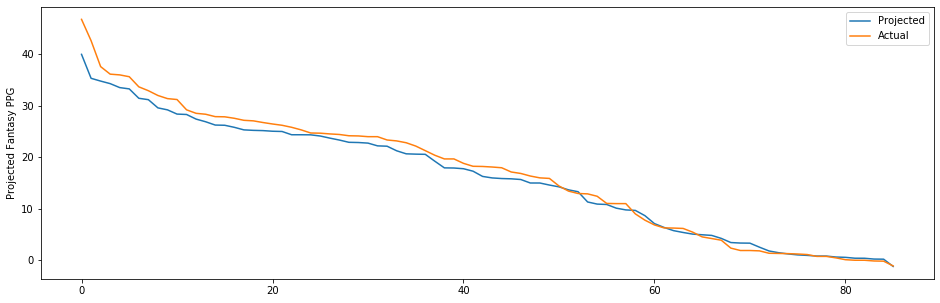

In [59]:
df_plot = df_yty_pg_goalie.sort_values(by='Projected Fantasy PPG',ascending=False).reset_index(drop=False)
df_plot2 = df_yty_pg_goalie.sort_values(by='Fantasy PPG',ascending=False).reset_index(drop=False)
plt.figure(figsize=(16,5))
sns.lineplot(df_plot.index.values, 'Projected Fantasy PPG',data=df_plot,label='Projected')
sns.lineplot(df_plot2.index.values, 'Fantasy PPG',data=df_plot2,label='Actual')
plt.legend()

#### Combined

Now that we have both skaters and goalies calculated, we can consolidate the datasets into a comprehensive ranking list that includes all players that can be used in a fantasy draft. The list is sorted on a descending points per game basis making the assumption that all players will be playing a full 82 game season.

For obvious reasons, that will obviously not be the case; however, we do not have a better method currently to assess and estimate the number of games a player will be able to play and therefore assume that we will maximize our ability to score points with elite players that can generate maximum points per game. Factors like contract negotiations, injuries, and trades are future things to consider.

In [60]:
df_yty_pg = pd.concat([df_yty_pg_skaters[['Player Name','Pos','Games','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']],
                       df_yty_pg_goalie[['Player Name','Pos','Games','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']]])
df_yty_pg.sort_values(by='Projected Fantasy PPG',ascending=False)[:50]

,Player Name,Pos,Games,Fantasy Points,Fantasy PPG,Projected Fantasy PPG
1,David Pastrnak,RW,70,3487.5,49.821429,44.418786
9,Connor McDavid,C,64,3211.0,50.171875,44.085641
3,Leon Draisaitl,C,71,3591.0,50.577465,44.074706
8,Nathan MacKinnon,C,69,3311.0,47.985507,43.243588
1,Connor Hellebuyck,G,58,3275.0,46.785714,39.987300
4,Mika Zibanejad,C,57,2766.0,48.526316,39.645158
34,Evgeni Malkin,C,55,2529.5,45.990909,39.632949
10,Patrick Kane,RW,70,2925.5,41.792857,36.757668
13,Artemi Panarin,LW,69,3231.5,46.833333,36.580517
22,Brad Marchand,LW,70,3068.5,43.835714,35.914175


C:\Users\Owner\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


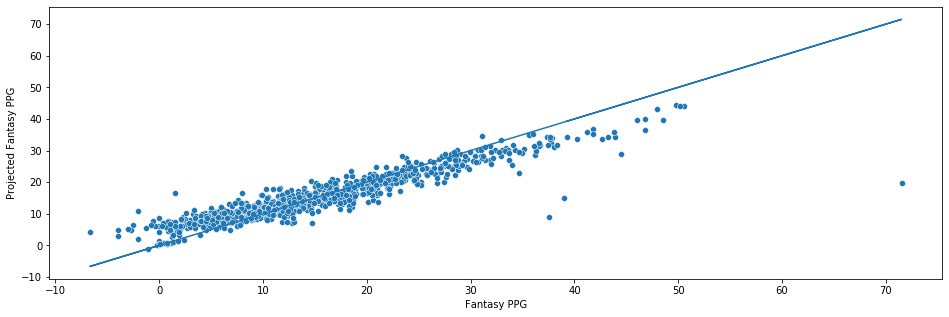

In [61]:
plt.figure(figsize=(16,5))
sns.scatterplot(df_yty_pg['Fantasy PPG'],df_yty_pg['Projected Fantasy PPG'],data=df_yty_pg)
plt.plot(df_yty_pg['Fantasy PPG'],df_yty_pg['Fantasy PPG'])

# Draft Strategy

The following section is meant to be used to help generate an optimal strategy to draft the best team.

## Draft Position

In [62]:
num_teams = 18
num_rounds = 16
draft_positions = {team:[] for team in range(1,num_teams+1)}
pick = 1
for rd in range(1,num_rounds+1):
    if rd%2==1:
        for team in range(1,num_teams+1):
            draft_positions[team].append(pick)
            pick+=1
    else:
        for team in reversed(range(1,num_teams+1)):
            draft_positions[team].append(pick)
            pick+=1
draft_positions[1]

[1, 36, 37, 72, 73, 108, 109, 144, 145, 180, 181, 216, 217, 252, 253, 288]

## Keeper List

Using a list supplied by our league commissioner, players have been assessed a ranking to determine their keeper value. The following section aims to use the estimated fantasy point production / rankings to create my own keeper value, and comparing the variances to maximize my keeper selections.

In [63]:
keeper_list_text = "1 Connor McDavid 1 2 Leon Draisaitl 1 3 Nathan MacKinnon 1 4 Artemi Panarin 1 5 Auston Matthews 1 6 Patrick Kane 1 7 Andrei Vasilevskiy 1 8 Mika Zibanejad 1 9 Sidney Crosby 1 10 Alex Ovechkin 1 11 Brad Marchand 1 12 Jack Eichel 1 13 Mitch Marner 1 14 Steven Stamkos 1 15 Connor Hellebuyck 1 16 John Carlson 1 17 Jake Guentzel 1 18 John Tavares 1 19 Jonathan Huberdeau 2 20 Sebastian Aho 2 21 Andrei Svechnikov 2 22 J.T. Miller 2 23 Brayden Point 2 24 Frederik Andersen 2 25 Aleksander Barkov 2 26 Igor Shesterkin 2 27 Kyle Connor 2 28 Ryan O'Reilly 2 29 Elias Pettersson 2 30 Sean Couturier 2 31 Roman Josi 2 32 Evgeni Malkin 2 33 Blake Wheeler 2 34 Matthew Tkachuk 2 35 Mark Stone 2 36 Max Pacioretty 2 37 Johnny Gaudreau 3 38 Teuvo Teravainen 3 39 Claude Giroux 3 40 Taylor Hall 3 41 Anze Kopitar 3 42 Dougie Hamilton 3 43 Patrice Bergeron 3 44 Elias Lindholm 3 45 Anton Khudobin 3 46 Patrik Laine 3 47 Dylan Larkin 3 48 Mikko Rantanen 3 49 Victor Hedman 3 50 Brent Burns 3 51 Travis Konecny 3 52 Jordan Binnington 3 53 Mark Scheifele 3 54 Gabriel Landeskog 3 55 Kevin Fiala 4 56 Nikolaj Ehlers 4 57 Morgan Rielly 4 58 Sean Monahan 4 59 Cale Makar 4 60 Brady Tkachuk 4 61 Sergei Bobrovsky 4 62 Carey Price 4 63 David Pastrnak 4 64 Ryan Nugent-Hopkins 4 65 Tomas Tatar 4 66 Robin Lehner 4 67 Mike Hoffman 4 68 Shea Theodore 4 69 John Gibson 4 70 Darcy Kuemper 4 71 Jacob Markstrom 4 72 Mathew Barzal 4 73 Kris Letang 5 74 Brock Nelson 5 75 Torey Krug 5 76 Quinn Hughes 5 77 Evander Kane 5 78 Timo Meier 5 79 Brayden Schenn 5 80 Oliver Bjorkstrand 5 81 Bo Horvat 5 82 Jakub Voracek 5 83 Brendan Gallagher 5 84 Mikko Koskinen 5 85 William Nylander 5 86 Alexis Lafreniere 5 87 Rasmus Dahlin 5 88 Tyson Barrie 5 89 Anthony DeAngelo 5 90 Sam Reinhart 5 91 Miro Heiskanen 6 92 Alex DeBrincat 6 93 Phillip Danault 6 94 Alex Pietrangelo 6 95 Jonathan Marchessault 6 96 William Karlsson 6 97 Bryan Rust 6 98 Aaron Ekblad 6 99 Erik Karlsson 6 100 Pierre-Luc Dubois 6 101 Nicklas Backstrom 6 102 Kirill Kaprizov 6 103 Clayton Keller 6 104 Tuukka Rask 6 105 Ryan Pulock 6 106 Evgeny Kuznetsov 6 107 Tristan Jarry 6 108 Tomas Hertl 6 109 Philipp Grubauer 7 110 Reilly Smith 7 111 Jakub Vrana 7 112 Nikita Gusev 7 113 Zach Werenski 7 114 Linus Ullmark 7 115 Darnell Nurse 7 116 Tom Wilson 7 117 Brock Boeser 7 118 Mikhail Sergachev 7 119 Ilya Samsonov 7 120 Mark Giordano 7 121 David Perron 7 122 Ryan Johansen 7 123 Jamie Benn 7 124 Matt Duchene 7 125 Filip Forsberg 7 126 Cam Talbot 7 127 Kasperi Kapanen 8 128 Thomas Chabot 8 129 Anders Lee 8 130 Dominik Kubalik 8 131 Anthony Mantha 8 132 Carter Hart 8 133 Seth Jones 8 134 Jason Zucker 8 135 Charlie McAvoy 8 136 Max Domi 8 137 Anthony Cirelli 8 138 Oliver Ekman-Larsson 8 139 Ryan Strome 8 140 Tyler Toffoli 8 141 Conor Garland 8 142 Rasmus Ristolainen 8 143 Neal Pionk 8 144 Jeff Petry 8 145 Ryan Suter 9 146 Logan Couture 9 147 Alexander Radulov 9 148 Nazem Kadri 9 149 Cam Atkinson 9 150 Chris Kreider 9 151 Jaccob Slavin 9 152 Ryan Ellis 9 153 Adam Fox 9 154 Ivan Provorov 9 155 Matt Dumba 9 156 Pavel Buchnevich 9 157 Mackenzie Blackwood 9 158 Jordan Eberle 9 159 Devon Toews 9 160 Kailer Yamamoto 9 161 Jonathan Toews 9 162 Colton Parayko 9 163 Christian Dvorak 10 164 Braden Holtby 10 165 Jacob Trouba 10 166 Zach Hyman 10 167 Drew Doughty 10 168 Nico Hischier 10 169 Mikael Backlund 10 170 Kevin Hayes 10 171 T.J. Oshie 10 172 John Klingberg 10 173 Eric Staal 10 174 Shea Weber 10 175 David Krejci 10 176 Tanner Pearson 10 177 Keith Yandle 10 178 Jaden Schwartz 10 179 Erik Gustafsson 10 180 Anthony Beauvillier 10 181 Rickard Rakell 11 182 Tyler Bertuzzi 11 183 Vincent Trocheck 11 184 Collin Delia 11 185 Filip Hronek 11 186 Thomas Greiss 11 187 Viktor Arvidsson 11 188 Josh Bailey 11 189 James van Riemsdyk 11 190 Ilya Mikheyev 11 191 Alex Killorn 11 192 Dylan Strome 11 193 Elvis Merzlikins 11 194 Evgenii Dadonov 11 195 Jakob Chychrun 11 196 Phil Kessel 11 197 Kyle Palmieri 11 198 Jared Spurgeon 11 199 Mattias Ekholm 12 200 Joe Pavelski 12 201 Blake Coleman 12 202 Kevin Labanc 12 203 Adam Henrique 12 204 Kaapo Kakko 12 205 Michael Matheson 12 206 Alex Iafallo 12 207 Josh Morrissey 12 208 Mikael Granlund 12 209 Jakob Silfverberg 12 210 Robert Thomas 12 211 Juuse Saros 12 212 Damon Severson 12 213 Andre Burakovsky 12 214 Devan Dubnyk 12 215 Jake Virtanen 12 216 Nick Suzuki 12 217 Jean-Gabriel Pageau 13 218 Ondrej Palat 13 219 Victor Olofsson 13 220 Matt Murray 13 221 Tyler Myers 13 222 Alexander Edler 13 223 Jeff Skinner 13 224 Jonathan Drouin 13 225 Jake DeBrusk 13 226 Alex Goligoski 13 227 Andreas Johnsson 13 228 Jared McCann 13 229 Paul Stastny 13 230 Chris Tierney 13 231 Petr Mrazek 13 232 Samuel Girard 13 233 Pekka Rinne 13 234 Roope Hintz 13 235 Semyon Varlamov 14 236 Ryan Getzlaf 14 237 Andreas Athanasiou 14 238 Jake Muzzin 14 239 Noah Hanifin 14 240 Oskar Lindblom 14 241 Nate Schmidt 14 242 Brandon Saad 14 243 Vince Dunn 14 244 Lawson Crouse 14 245 Frank Vatrano 14 246 Denis Gurianov 14 247 Andrew Mangiapane 14 248 Zach Parise 14 249 Travis Sanheim 14 250 Cal Petersen 14 251 P.K. Subban 14 252 Dustin Brown 14 253 Connor Brown 15 254 Marco Rossi 15 255 Lars Eller 15 256 Alex Galchenyuk 15 257 Yanni Gourde 15 258 Patric Hornqvist 15 259 Scott Laughton 15 260 Duncan Keith 15 261 Brandon Montour 15 262 Ryan Graves 15 263 Nick Schmaltz 15 264 Erik Cernak 15 265 Cam Fowler 15 266 Ondrej Kase 15 267 Esa Lindell 15 268 Ilya Sorokin 15 269 Tyler Johnson 15 270 Vincent Hinostroza 15 271 Craig Smith 16 272 Brady Skjei 16 273 Danton Heinen 16 274 Brett Connolly 16 275 Justin Faulk 16 276 Calle Jarnkrok 16 277 Vladislav Namestnikov 16 278 Dylan Cozens 16 279 Colin White 16 280 Charlie Coyle 16 281 Jordan Staal 16 282 Luke Kunin 16 283 Nino Niederreiter 16 284 Hampus Lindholm 16 285 Barclay Goodrow 16 286 Valeri Nichushkin 16 287 Jesper Bratt 16 288 Alex Tuch 16 289 Nikita Zadorov 17 290 Sam Steel 17 291 Sean Walker 17 292 Jonas Brodin 17 293 Anthony Duclair 17 294 Nick Foligno 17 295 Derek Stepan 17 296 Marcus Pettersson 17 297 Tyler Ennis 17 298 Adrian Kempe 17 299 Jack Hughes 17 300 Matt Grzelcyk 17"

Parsing the keeper list (which came in the form a string) and transforming it into a dataframe.

In [64]:
keeper_list = keeper_list_text.split(' ')
ranks = []
names = []
rounds = []
counter = 0

for i in range(len(keeper_list)):
    if re.search('[\d]',keeper_list[i]):
        if counter%2 == 0:
            ranks.append(keeper_list[i])
            name = []
        else:
            rounds.append(keeper_list[i])
            names.append(' '.join(name))
        counter += 1
    else:
        name.append(keeper_list[i])

In [65]:
df_keeper = pd.DataFrame([pd.to_numeric(pd.Series(ranks,name='Rank')),
                          pd.Series(names,name='Player Name'),
                          pd.to_numeric(pd.Series(rounds,name='Round'))]).T
df_keeper

,Rank,Player Name,Round
0,1,Connor McDavid,1
1,2,Leon Draisaitl,1
2,3,Nathan MacKinnon,1
3,4,Artemi Panarin,1
4,5,Auston Matthews,1
...,...,...,...
295,296,Marcus Pettersson,17
296,297,Tyler Ennis,17
297,298,Adrian Kempe,17
298,299,Jack Hughes,17


In [66]:
df_keeper.to_csv('keeper_list.csv')

Combining my fantasy point projections with the keeper list ranking, I can now sort and compare rankings of the players in the league keeper list to the value that I've placed on all the players.

In [67]:
keeper_yty = df_keeper.merge(df_yty, on='Player Name', how='left')
keeper_yty[['Round','Rank','Player Name','Fantasy Points','Projected Fantasy Points']][:50]

,Round,Rank,Player Name,Fantasy Points,Projected Fantasy Points
0,1,1,Connor McDavid,3211.0,2558.678814
1,1,2,Leon Draisaitl,3591.0,2610.476471
2,1,3,Nathan MacKinnon,3311.0,2728.255653
3,1,4,Artemi Panarin,3231.5,2398.087457
4,1,5,Auston Matthews,3023.0,2539.802781
5,1,6,Patrick Kane,2925.5,2460.021492
6,1,7,Andrei Vasilevskiy,NaN,NaN
7,1,8,Mika Zibanejad,2766.0,2016.141700
8,1,9,Sidney Crosby,1543.5,1281.670069
9,1,10,Alex Ovechkin,2670.5,2429.917524


In [68]:
keeper_yty_pg = df_keeper.merge(df_yty_pg, on='Player Name', how='left')
keeper_yty_pg['My Rank'] = keeper_yty_pg['Projected Fantasy PPG'].rank(ascending=False)
keeper_yty_pg['Rank Diff'] = keeper_yty_pg['Rank'] - keeper_yty_pg['My Rank']
# keeper_yty_pg[keeper_yty_pg['My Rank'].notnull()]['My Round'] = keeper_yty_pg[keeper_yty_pg['My Rank'].notnull()].apply(lambda x: math.floor(x/18)+1)
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']][:50]

,Round,Rank,My Rank,Rank Diff,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
0,1,1,2.0,-1,Connor McDavid,C,50.171875,44.085641
1,1,2,3.0,-1,Leon Draisaitl,C,50.577465,44.074706
2,1,3,4.0,-1,Nathan MacKinnon,C,47.985507,43.243588
3,1,4,9.0,-5,Artemi Panarin,LW,46.833333,36.580517
4,1,5,18.0,-13,Auston Matthews,C,43.185714,34.302062
5,1,6,8.0,-2,Patrick Kane,RW,41.792857,36.757668
6,1,7,23.0,-16,Andrei Vasilevskiy,G,42.642857,33.533047
7,1,8,6.0,2,Mika Zibanejad,C,48.526316,39.645158
8,1,9,21.0,-12,Sidney Crosby,C,37.646341,33.711071
9,1,10,16.0,-6,Alex Ovechkin,LW,39.272059,34.360429


Inspecting the keeper list in relation to the round of the draft. This section is intended to make reviewing the value picks at each round.

In [69]:
rd = 9
keeper_yty_pg[(keeper_yty_pg['Round']>=rd-1)&(keeper_yty_pg['Round']<=rd+1)][['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']]

,Round,Rank,My Rank,Rank Diff,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
126,8,127,249.0,-122,Kasperi Kapanen,RW,18.891304,17.200847
127,8,128,155.0,-27,Thomas Chabot,D,20.492958,21.859606
128,8,129,122.0,7,Anders Lee,C,26.051471,23.423337
129,8,130,195.0,-65,Dominik Kubalik,LW,25.183824,20.033835
130,8,131,32.0,99,Anthony Mantha,RW,31.825581,31.378925
131,8,132,69.0,63,Carter Hart,G,27.892857,27.412875
132,8,133,203.0,-70,Seth Jones,D,22.839286,19.593869
133,8,134,131.0,3,Jason Zucker,LW,24.141667,22.813741
134,8,135,256.0,-121,Charlie McAvoy,D,21.261194,16.490665
135,8,136,150.0,-14,Max Domi,C,22.373239,22.103479


### Average Projected Fantasy PPG for Draft Position

Assuming that I drafted according to my player rankings, I wanted to see what the optimal draft order was in relation to other positions. This 

In [70]:
df_draft_position_mean = pd.DataFrame([pd.Series(keeper_yty_pg[keeper_yty_pg['My Rank'].isin(draft_positions[i])][['Round','Rank','My Rank','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].mean(),name=f"Team {i}") for i in range(1,num_teams+1)])
df_draft_position_mean

,Round,Rank,My Rank,Fantasy PPG,Projected Fantasy PPG
Team 1,9.0000,152.1875,144.5,26.214915,23.570580
Team 2,9.3750,160.1875,144.5,24.832408,23.665868
Team 3,8.7500,150.6875,144.5,24.994601,23.695646
Team 4,7.4375,124.3125,144.5,25.616969,23.671626
Team 5,8.6250,148.6250,144.5,25.811843,23.511073
Team 6,8.7500,145.5625,144.5,25.459299,23.499587
Team 7,9.2500,155.3750,144.5,25.563026,23.495698
Team 8,7.8125,132.2500,144.5,25.996436,23.327226
Team 9,8.9375,150.8125,144.5,25.215995,23.315806
Team 10,8.6875,147.1250,144.5,24.908344,23.306590


In [71]:
df_draft_position_mean.sort_values(by='Projected Fantasy PPG',ascending=False)

,Round,Rank,My Rank,Fantasy PPG,Projected Fantasy PPG
Team 3,8.7500,150.6875,144.5,24.994601,23.695646
Team 4,7.4375,124.3125,144.5,25.616969,23.671626
Team 2,9.3750,160.1875,144.5,24.832408,23.665868
Team 1,9.0000,152.1875,144.5,26.214915,23.570580
Team 5,8.6250,148.6250,144.5,25.811843,23.511073
Team 6,8.7500,145.5625,144.5,25.459299,23.499587
Team 7,9.2500,155.3750,144.5,25.563026,23.495698
Team 14,8.0625,135.9375,144.5,24.860741,23.333247
Team 8,7.8125,132.2500,144.5,25.996436,23.327226
Team 15,9.3750,160.5625,144.5,24.307757,23.317295


In [72]:
df_draft_position_mean.sort_values(by='Fantasy PPG',ascending=False)

,Round,Rank,My Rank,Fantasy PPG,Projected Fantasy PPG
Team 1,9.0000,152.1875,144.5,26.214915,23.570580
Team 17,8.2500,140.8125,144.5,26.142396,23.293642
Team 8,7.8125,132.2500,144.5,25.996436,23.327226
Team 5,8.6250,148.6250,144.5,25.811843,23.511073
Team 4,7.4375,124.3125,144.5,25.616969,23.671626
Team 7,9.2500,155.3750,144.5,25.563026,23.495698
Team 6,8.7500,145.5625,144.5,25.459299,23.499587
Team 9,8.9375,150.8125,144.5,25.215995,23.315806
Team 16,8.5625,147.0625,144.5,25.195842,23.310221
Team 13,9.1875,159.6875,144.5,25.038805,23.277885


## No data on Keeper List

The following are players that I have no data on. Majority of these players are rookies and do not have NHL experience.

In [73]:
keeper_yty_pg[keeper_yty_pg['Projected Fantasy PPG'].isnull()]

,Rank,Player Name,Round,Pos,Games,Fantasy Points,Fantasy PPG,Projected Fantasy PPG,My Rank,Rank Diff
85,86,Alexis Lafreniere,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,102,Kirill Kaprizov,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,157,Mackenzie Blackwood,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,184,Collin Delia,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
204,205,Michael Matheson,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,254,Marco Rossi,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,268,Ilya Sorokin,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,270,Vincent Hinostroza,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277,278,Dylan Cozens,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## My Keepers

The following list is the roster I had at the end of the previous year's season and the players I have available to choose optimal value keepers in relation to the list provided by my league commissioner.

In [74]:
roster = ['Dougie Hamilton',
         'Teuvo Teravainen',
         'Elias Lindholm',
         'Jonathan Toews',
         'Cam Atkinson',
         'Nikolaj Ehlers',
         'Tyler Seguin',
         'Alex Tuch',
         'Tyler Johnson',
         'Esa Lindell',
         'Ryan Dzingel',
         'Vince Dunn',
         'Zack Kassian',
         'T.J. Brodie',
         'Andrei Vasilevskiy',
         'Jacob Markstrom']

Understanding the picks that are associated for a particular draft position is important with respect to the snake format. Because there are 18 people in my league, the picks can be as large as 36 positions and carries a large implication to the value players retained.

In [75]:
# Understanding what the picks were for each draft position:
print(draft_positions[1])
print(draft_positions[4])
print(draft_positions[18])

[1, 36, 37, 72, 73, 108, 109, 144, 145, 180, 181, 216, 217, 252, 253, 288]
[4, 33, 40, 69, 76, 105, 112, 141, 148, 177, 184, 213, 220, 249, 256, 285]
[18, 19, 54, 55, 90, 91, 126, 127, 162, 163, 198, 199, 234, 235, 270, 271]


Filtering the evaluation list of players and ranks for the players in my previous year's roster, I can review and pick the best value keepers in relation to the

In [76]:
keeper_yty_pg['My Rank'] = keeper_yty_pg['Projected Fantasy PPG'].rank(ascending=False)
keeper_yty_pg['Rank Diff'] = keeper_yty_pg['Rank']-keeper_yty_pg['My Rank']
# keeper_yty['My Round'] = keeper_yty_pg['My Rank'].apply(lambda x: math.floor(x/18)+1)
keeper_yty_pg[keeper_yty_pg['Player Name'].isin(roster)][['Player Name','Round','Rank','My Rank','Rank Diff','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Round,Rank,My Rank,Rank Diff,Fantasy PPG,Projected Fantasy PPG
6,Andrei Vasilevskiy,1,7,23.0,-16,42.642857,33.533047
37,Teuvo Teravainen,3,38,44.0,-6,32.779412,29.676189
41,Dougie Hamilton,3,42,43.0,-1,36.319149,29.928486
43,Elias Lindholm,3,44,90.0,-46,28.492857,25.697442
55,Nikolaj Ehlers,4,56,101.0,-45,29.626761,24.894827
70,Jacob Markstrom,4,71,49.0,22,33.678571,29.210540
148,Cam Atkinson,9,149,105.0,44,23.568182,24.646083
160,Jonathan Toews,9,161,93.0,68,29.171429,25.362074
242,Vince Dunn,14,243,251.0,-8,15.225352,17.020416
266,Esa Lindell,15,267,281.0,-14,15.434783,14.496247


## Forecasted Roster

Assuming no keepers, the follow are the rosters that I would theoretically have based on the draft position I have for the draft (2nd overall). 

For the keeper list ranking: 

In [77]:
keeper_yty_pg[keeper_yty_pg['Rank'].isin(draft_positions[2])][['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Pos,Round,Rank,My Rank,Rank Diff,Fantasy PPG,Projected Fantasy PPG
1,Leon Draisaitl,C,1,2,3.0,-1,50.577465,44.074706
34,Mark Stone,RW,2,35,48.0,-13,34.630769,29.450015
37,Teuvo Teravainen,C,3,38,44.0,-6,32.779412,29.676189
70,Jacob Markstrom,G,4,71,49.0,22,33.678571,29.210540
73,Brock Nelson,C,5,74,118.0,-44,28.786765,23.729372
106,Tristan Jarry,G,6,107,165.0,-58,26.750000,21.261465
109,Reilly Smith,RW,7,110,144.0,-34,28.500000,22.385375
142,Neal Pionk,D,8,143,84.0,59,26.415493,26.287099
145,Logan Couture,C,9,146,139.0,7,27.711538,22.542871
178,Erik Gustafsson,D,10,179,244.0,-65,16.371212,17.375164


For my rankings:

In [78]:
keeper_yty_pg[keeper_yty_pg['My Rank'].isin(draft_positions[2])][['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Pos,Round,Rank,My Rank,Rank Diff,Fantasy PPG,Projected Fantasy PPG
0,Connor McDavid,C,1,1,2.0,-1,50.171875,44.085641
45,Patrik Laine,RW,3,46,38.0,8,34.308824,30.157895
52,Mark Scheifele,C,3,53,35.0,18,35.112676,30.596691
72,Kris Letang,D,5,73,74.0,-1,28.778689,27.016417
80,Bo Horvat,C,5,81,71.0,10,26.942029,27.345006
140,Conor Garland,RW,8,141,182.0,-41,21.588235,20.468909
163,Braden Holtby,G,10,164,110.0,54,26.464286,24.356748
164,Jacob Trouba,D,10,165,179.0,-14,18.985714,20.473272
179,Anthony Beauvillier,LW,10,180,218.0,-38,20.661765,18.992415
182,Vincent Trocheck,C,11,183,146.0,37,22.879032,22.319782


## My Rankings

### Round by Round Fantasy Value

Looking into the keeper list round by round, I was curious what the expected fantasy point production I was to expect drafting in each round. The table below is a groupby dataframe to show the mean fantasy points of actual and estimated projections. Both total fantasy points and fantasy points per game were looked at.

In [79]:
keeper_yty = df_keeper.merge(df_yty, on='Player Name', how='left')
keeper_yty[['Round','Rank','Player Name','Fantasy Points','Projected Fantasy Points']].groupby(by='Round').mean()

,Fantasy Points,Projected Fantasy Points
Round,,
1,2692.093750,2114.482279
2,2371.781250,1847.705374
3,1990.406250,1624.590357
4,2029.250000,1643.570033
5,1776.812500,1470.394666
6,1664.933333,1372.953693
7,1657.678571,1337.407137
8,1559.794118,1273.856155
9,1441.264706,1182.125514


In [80]:
keeper_yty_pg = df_keeper.merge(df_yty_pg, on='Player Name', how='left')
keeper_yty_pg[['Round','Rank','Player Name','Fantasy PPG','Projected Fantasy PPG']].groupby(by='Round').describe()

Fantasy PPG                                                        \
            count       mean       std        min        25%        50%   
Round                                                                     
1            18.0  42.890137  4.799179  33.373016  39.514942  42.224937   
2            18.0  33.934066  6.414903  12.892857  32.478567  34.785973   
3            18.0  31.061343  3.930380  24.000000  28.535027  31.441919   
4            18.0  30.483760  5.994740  22.946809  28.026786  29.793849   
5            17.0  27.297448  2.800467  20.250000  25.907143  28.573770   
6            17.0  26.640010  4.666184  20.595588  23.678571  25.657143   
7            18.0  24.176218  3.897085  17.964286  21.430195  24.129141   
8            18.0  23.986327  3.634059  18.891304  21.342954  23.490476   
9            17.0  24.631445  4.847790  16.161765  22.733333  23.615942   
10           18.0  22.998255  3.202694  16.371212  20.394919  23.367340   
11           17.0  21.796733  2.814875  16.807692  19.678571  22.007576   
12           17.0  20.016461  4.064223  11.871212  17.876923  19.704225   
13           18.0  20.909692  3.616456  15.042373  18.477284  20.652817   
14           18.0  18.584748  5.029230   6.857143  14.915034  19.387455   
15           15.0  18.708478  3.680505  13.440299  15.717391  18.530769   
16           17.0  17.229115  2.405739  12.326087  16.116071  17.022059   
17           12.0  16.052222  3.803962  11.638462  13.449944  15.423319   

                            Projected Fantasy PPG                       \
             75%        max                 count       mean       std   
Round                                                                    
1      46.821429  50.577465                  18.0  36.526739  4.057601   
2      36.643371  45.990909                  18.0  29.190886  6.085491   
3      34.246499  36.549180                  18.0  28.913987  2.384895   
4      31.114616  49.821429                  18.0  28.127408  5.005626   
5      28.857143  31.109375                  17.0  25.883715  3.035362   
6      28.507576  38.045455                  17.0  24.459589  4.490710   
7      27.799073  31.014085                  18.0  22.696001  4.019485   
8      25.845588  31.825581                  18.0  22.190068  3.806217   
9      28.558824  34.666667                  17.0  22.116341  2.994399   
10     24.825107  28.436620                  18.0  21.598392  2.162734   
11     23.357143  27.044118                  17.0  21.593204  3.075282   
12     22.114286  27.612069                  17.0  19.346517  2.817669   
13     24.014286  27.268519                  18.0  19.585036  2.949420   
14     21.808451  28.357143                  18.0  18.007177  5.132217   
15     21.324899  27.134615                  15.0  17.477131  3.026242   
16     18.888889  20.935714                  17.0  17.215737  1.678120   
17     18.559239  23.424242                  12.0  16.898456  3.286314   

                                                              
             min        25%        50%        75%        max  
Round                                                         
1      30.778315  33.806882  35.480155  38.923286  44.085641  
2       8.661509  28.327731  29.834967  31.668060  39.632949  
3      25.697442  26.877738  28.835644  30.224848  34.796617  
4      22.510280  25.228962  27.305573  29.540787  44.418786  
5      21.345293  24.019068  25.374174  27.345006  34.741658  
6      18.558813  21.261465  22.700358  27.751645  35.336242  
7      15.681926  19.745999  22.999820  24.627293  30.150735  
8      16.490665  19.703861  21.948804  23.786982  31.378925  
9      16.236486  20.156854  22.549319  24.174079  26.717739  
10     17.375164  20.471964  21.473181  22.590020  27.176273  
11     17.757903  19.390337  20.571840  23.515562  28.308453  
12     10.831156  18.271463  19.632787  21.173087  23.346011  
13     15.681868  17.283655  19.735514  20.514442  28.276901  
14      4.823737

### Fantasy Points Per Game Rankings

#### Keeper List Rankings

In [81]:
keeper_yty_pg = df_keeper.merge(df_yty_pg, on='Player Name', how='left')
keeper_yty_pg['My Rank'] = keeper_yty_pg['Projected Fantasy PPG'].rank(ascending=False)
keeper_yty_pg['Rank Diff'] = keeper_yty_pg['Rank']-keeper_yty_pg['My Rank'] 
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']][:50]

,Round,Rank,My Rank,Rank Diff,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
0,1,1,2.0,-1,Connor McDavid,C,50.171875,44.085641
1,1,2,3.0,-1,Leon Draisaitl,C,50.577465,44.074706
2,1,3,4.0,-1,Nathan MacKinnon,C,47.985507,43.243588
3,1,4,9.0,-5,Artemi Panarin,LW,46.833333,36.580517
4,1,5,18.0,-13,Auston Matthews,C,43.185714,34.302062
5,1,6,8.0,-2,Patrick Kane,RW,41.792857,36.757668
6,1,7,23.0,-16,Andrei Vasilevskiy,G,42.642857,33.533047
7,1,8,6.0,2,Mika Zibanejad,C,48.526316,39.645158
8,1,9,21.0,-12,Sidney Crosby,C,37.646341,33.711071
9,1,10,16.0,-6,Alex Ovechkin,LW,39.272059,34.360429


#### My Rankings (Linear Regression)

In [82]:
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='My Rank',ascending=True)[:50]

,Round,Rank,My Rank,Rank Diff,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
62,4,63,1.0,62,David Pastrnak,RW,49.821429,44.418786
0,1,1,2.0,-1,Connor McDavid,C,50.171875,44.085641
1,1,2,3.0,-1,Leon Draisaitl,C,50.577465,44.074706
2,1,3,4.0,-1,Nathan MacKinnon,C,47.985507,43.243588
14,1,15,5.0,10,Connor Hellebuyck,G,46.785714,39.987300
7,1,8,6.0,2,Mika Zibanejad,C,48.526316,39.645158
31,2,32,7.0,25,Evgeni Malkin,C,45.990909,39.632949
5,1,6,8.0,-2,Patrick Kane,RW,41.792857,36.757668
3,1,4,9.0,-5,Artemi Panarin,LW,46.833333,36.580517
10,1,11,10.0,1,Brad Marchand,LW,43.835714,35.914175


### Most Undervalued Player

Below is a list of players that are the most undervalued in the keeper rankings as compared to what I've forecasted for fantasy point production.

In [83]:
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Rank Diff',ascending=False)[:50]

,Round,Rank,My Rank,Rank Diff,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
234,14,235,47.0,188,Semyon Varlamov,G,28.357143,29.592096
218,13,219,61.0,158,Victor Olofsson,LW,27.268519,28.276901
257,15,258,108.0,150,Patric Hornqvist,RW,27.134615,24.412444
247,14,248,107.0,141,Zach Parise,LW,23.847826,24.447729
292,17,293,158.0,135,Anthony Duclair,LW,23.424242,21.579734
192,11,193,58.0,135,Elvis Merzlikins,G,23.357143,28.308453
296,17,297,169.0,128,Tyler Ennis,LW,20.150000,20.995642
297,17,298,186.0,112,Adrian Kempe,C,18.028986,20.192652
196,11,197,87.0,110,Kyle Palmieri,RW,26.438462,26.105282
177,10,178,72.0,106,Jaden Schwartz,LW,28.436620,27.176273


### Most Overvalued Players

Below is a list of players that are the most overvalued in the keeper rankings as compared to what I've forecasted for fantasy point production.

In [84]:
keeper_yty_pg[['Round','Rank','My Rank','Rank Diff','Player Name','Pos','Fantasy PPG','Projected Fantasy PPG']].sort_values(by='Rank Diff',ascending=True)[:50]

,Round,Rank,My Rank,Rank Diff,Player Name,Pos,Fantasy PPG,Projected Fantasy PPG
25,2,26,290.0,-264,Igor Shesterkin,G,12.892857,8.661509
118,7,119,266.0,-147,Ilya Samsonov,G,17.964286,15.989528
125,7,126,270.0,-144,Cam Talbot,G,18.821429,15.681926
90,6,91,224.0,-133,Miro Heiskanen,D,20.595588,18.558813
126,8,127,249.0,-122,Kasperi Kapanen,RW,18.891304,17.200847
134,8,135,256.0,-121,Charlie McAvoy,D,21.261194,16.490665
121,7,122,236.0,-114,Ryan Johansen,C,18.816176,18.103770
158,9,159,262.0,-103,Devon Toews,D,16.161765,16.236486
104,6,105,204.0,-99,Ryan Pulock,D,22.463235,19.583510
114,7,115,213.0,-98,Darnell Nurse,D,20.929577,19.242800


### Advanced Stats

The following is the ranking list based on linear regression using advanced stats. Because the underlying data is different, the projected fantasy points are different as well.

In [85]:
keeper_adv = df_keeper.merge(df_2019_adv, on='Player Name', how='left')
keeper_adv['My Rank'] = keeper_adv['Projected Fantasy Points'].rank(ascending=False)
keeper_adv['Rank Diff'] = keeper_adv['Rank']-keeper_adv['My Rank']
keeper_adv[['Round','Rank','My Rank','Rank Diff','Player Name','Fantasy Points','Projected Fantasy Points']].dropna()[:50]

,Round,Rank,My Rank,Rank Diff,Player Name,Fantasy Points,Projected Fantasy Points
0,1,1,4.0,-3,Connor McDavid,2996.0,3134.689840
1,1,2,2.0,0,Leon Draisaitl,3371.0,3455.586475
2,1,3,3.0,0,Nathan MacKinnon,3156.0,3179.921643
3,1,4,6.0,-2,Artemi Panarin,3111.5,2885.104814
4,1,5,5.0,0,Auston Matthews,2898.0,3001.031380
5,1,6,10.0,-4,Patrick Kane,2810.5,2703.090327
7,1,8,11.0,-3,Mika Zibanejad,2581.0,2629.375639
8,1,9,143.0,-134,Sidney Crosby,1458.5,1450.243632
9,1,10,14.0,-4,Alex Ovechkin,2580.5,2471.966887
10,1,11,7.0,4,Brad Marchand,2898.5,2792.423609


# My Draft Results

In [86]:
drafted_team = [
    'Connor Hellebuyck',
    'Jonathan Huberdeau',
    'Max Pacioretty',
    'Mike Hoffman',
    'Jonathan Marchessault',
    'Tomas Tatar',
    'Jaden Schwartz',
    'Kyle Palmieri',
    'Keith Yandle',
    'Ryan Suter',
    'Phil Kessel',
    'Alex Killorn',
    'Seymon Varlamov',
    'Tyler Johnson',
    'Tyler Seguin',
]

# Results

How did my team fair in comparison to the rest of the league? Well... clearly not very good since I was 12th out of 18 teams in the league.

## Projected Results

In [103]:
keeper_yty_pg[keeper_yty['Player Name'].isin(drafted_team)][['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']]

,Player Name,Pos,Round,Rank,My Rank,Rank Diff,Fantasy Points,Fantasy PPG,Projected Fantasy PPG
14,Connor Hellebuyck,G,1,15,5.0,10,3275.0,46.785714,39.987300
18,Jonathan Huberdeau,LW,2,19,29.0,-10,2585.0,37.463768,31.598267
35,Max Pacioretty,LW,2,36,19.0,17,2649.5,37.316901,34.207962
64,Tomas Tatar,LW,4,65,65.0,0,2117.0,31.132353,28.170267
66,Mike Hoffman,LW,4,67,40.0,27,2119.0,30.710145,30.108577
94,Jonathan Marchessault,LW,6,95,55.0,40,1881.5,28.507576,28.521510
144,Ryan Suter,D,9,145,162.0,-17,1629.5,23.615942,21.343473
176,Keith Yandle,D,10,177,129.0,48,1537.5,22.282609,22.891259
177,Jaden Schwartz,LW,10,178,72.0,106,2019.0,28.436620,27.176273
190,Alex Killorn,C,11,191,121.0,70,1839.0,27.044118,23.433443


## Actual Results

In [163]:
df_2020_skaters = pd.read_csv('nhl-stats-2020-skaters.csv')
df_2020_skaters = df_2020_skaters.groupby(by='Player').sum().reset_index()
df_2020_skaters['2020 Fantasy Points'] = df_2020_skaters.apply(calc_skater_fantasy_points,axis=1)
df_2020_skaters['2020 Fantasy PPG'] = df_2020_skaters['2020 Fantasy Points']/df_2020_skaters['GP'] 
df_2020_goalies = pd.read_csv('nhl-stats-2020-goalies.csv')
df_2020_goalies['2020 Fantasy Points'] = df_2020_goalies.apply(calc_goalie_fantasy_points,axis=1)
df_2020_goalies['2020 Fantasy PPG'] = df_2020_goalies['2020 Fantasy Points']/df_2020_goalies['GP']

In [151]:
display(df_2020_skaters[df_2020_skaters['Player'].isin(drafted_team)][['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']].sort_values(by='2020 Fantasy Points',ascending=False))
display(df_2020_goalies[df_2020_goalies['Player'].isin(drafted_team)][['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']])

,Player,GP,2020 Fantasy Points,2020 Fantasy PPG
424,Jonathan Huberdeau,55,1721,31.290909
584,Max Pacioretty,48,1509,31.437500
425,Jonathan Marchessault,55,1324,24.072727
499,Kyle Palmieri,102,1140,11.176471
704,Phil Kessel,56,1102,19.678571
603,Mike Hoffman,52,1005,19.326923
27,Alex Killorn,56,932,16.642857
830,Tomas Tatar,50,808,16.160000
470,Keith Yandle,56,688,12.285714
853,Tyler Johnson,55,601,10.927273


,Player,GP,2020 Fantasy Points,2020 Fantasy PPG
35,Connor Hellebuyck,58,3275.0,56.465517


## Projected vs Actual

In [165]:
df_projected = keeper_yty_pg[['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']]
df_2020_skaters = df_2020_skaters[['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']]
df_2020_goalies = df_2020_goalies[['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']]
df_actual = pd.concat([df_2020_skaters,df_2020_goalies],axis=0)
df_results = pd.merge(df_projected,df_actual, left_on='Player Name', right_on='Player')
df_results['PPG Variance'] = df_results['Projected Fantasy PPG']-df_results['2020 Fantasy PPG']
df_results[['Player Name','Pos','2020 Fantasy Points','2020 Fantasy PPG','Projected Fantasy PPG','PPG Variance']]

,Player Name,Pos,2020 Fantasy Points,2020 Fantasy PPG,Projected Fantasy PPG,PPG Variance
0,Connor McDavid,C,2915.0,52.053571,44.085641,-7.967931
1,Leon Draisaitl,C,2422.0,43.250000,44.074706,0.824706
2,Nathan MacKinnon,C,1872.0,39.000000,43.243588,4.243588
3,Artemi Panarin,LW,1611.0,38.357143,36.580517,-1.776625
4,Auston Matthews,C,1970.0,37.884615,34.302062,-3.582554
...,...,...,...,...,...,...
288,Marcus Pettersson,D,297.0,6.319149,13.099349,6.780200
289,Tyler Ennis,LW,246.0,8.200000,20.995642,12.795642
290,Adrian Kempe,C,733.0,13.089286,20.192652,7.103366
291,Jack Hughes,C,831.0,14.839286,18.194788,3.355502


Looking at how the data compares on a scatterplot of actual vs projected fantasy PPG.

Points above the line mean the player outperformed the predicted points per game. Points below the line were players that underperformed the predicted values.

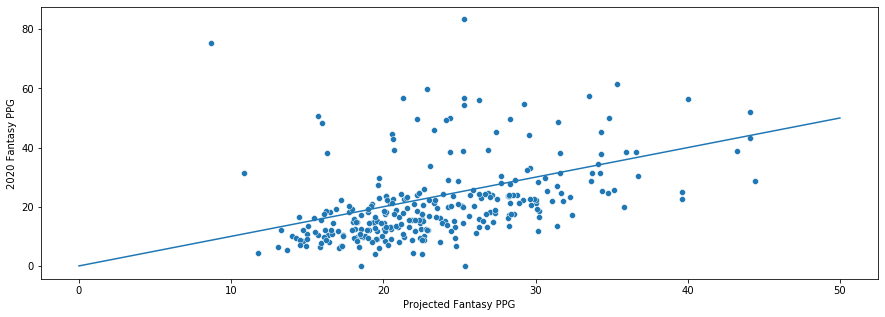

In [167]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_results,x='Projected Fantasy PPG',y='2020 Fantasy PPG')
sns.lineplot(x=np.linspace(0,50),y=np.linspace(0,50))

Comparing the variance between actual and forecasted values. The variance distribution largely looks to be positive with a mean of 2.5 pts, meaning that the majority of estimates are optimistic and higher than actual values.

count    289.000000
mean       2.453260
std       11.773085
min      -66.546825
25%       -0.371727
50%        5.034888
75%        8.894492
max       25.540841
Name: PPG Variance, dtype: float64

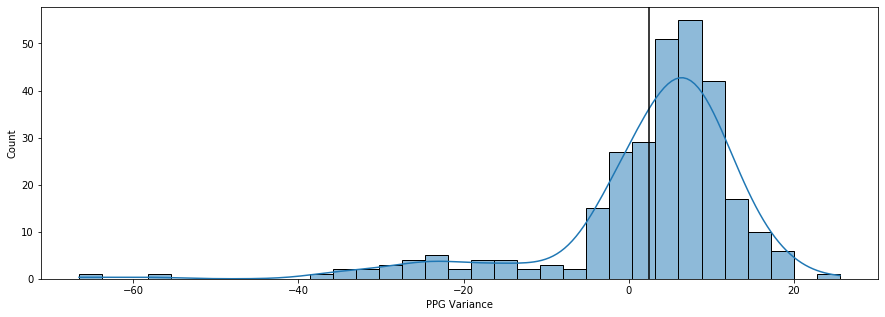

In [173]:
plt.figure(figsize=(15,5))
sns.histplot(df_results['PPG Variance'],kde=True)
plt.axvline(x=df_results['PPG Variance'].mean(),ymin=0,ymax=50,color='black')
df_results['PPG Variance'].describe()

### My team

Looking specifically at the team I drafted. Things didn't look great for me... based on the information below, my team systematically underperformed.

In [152]:
df_projected = keeper_yty_pg[keeper_yty['Player Name'].isin(drafted_team)][['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']]
df_2020_skaters = df_2020_skaters[df_2020_skaters['Player'].isin(drafted_team)][['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']]
df_2020_goalies = df_2020_goalies[df_2020_goalies['Player'].isin(drafted_team)][['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']]
df_actual = pd.concat([df_2020_skaters,df_2020_goalies],axis=0)

In [162]:
df_results = pd.merge(df_projected,df_actual, left_on='Player Name', right_on='Player')
df_results['PPG Variance'] = df_results['Projected Fantasy PPG']-df_results['2020 Fantasy PPG']
df_results[['Player Name','Pos','2020 Fantasy Points','2020 Fantasy PPG','Projected Fantasy PPG','PPG Variance']]

,Player Name,Pos,2020 Fantasy Points,2020 Fantasy PPG,Projected Fantasy PPG,PPG Variance
0,Connor Hellebuyck,G,3275.0,56.465517,39.987300,-16.478218
1,Jonathan Huberdeau,LW,1721.0,31.290909,31.598267,0.307358
2,Max Pacioretty,LW,1509.0,31.437500,34.207962,2.770462
3,Tomas Tatar,LW,808.0,16.160000,28.170267,12.010267
4,Mike Hoffman,LW,1005.0,19.326923,30.108577,10.781654
5,Jonathan Marchessault,LW,1324.0,24.072727,28.521510,4.448783
6,Ryan Suter,D,547.0,9.767857,21.343473,11.575616
7,Keith Yandle,D,688.0,12.285714,22.891259,10.605545
8,Jaden Schwartz,LW,595.0,14.875000,27.176273,12.301273
9,Alex Killorn,C,932.0,16.642857,23.433443,6.790585


With a 1:1 ratio of projected to actual fantasy points per game plotted against the performance of my roster, you can see quite clearly that most of my team sits below the line meaning that they underperformed the initial projections. It translated to subpar performance and was seen in my 12th place finish. 

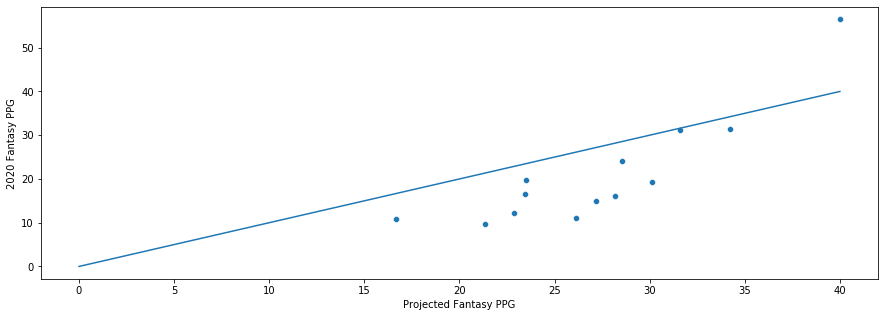

In [160]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df_results,x='Projected Fantasy PPG',y='2020 Fantasy PPG')
sns.lineplot(x=np.linspace(0,40),y=np.linspace(0,40))

## Most overrated/underrated players

In [182]:
df_projected = keeper_yty_pg[['Player Name','Pos','Round','Rank','My Rank','Rank Diff','Fantasy Points','Fantasy PPG','Projected Fantasy PPG']]
df_2020_skaters = df_2020_skaters[['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']]
df_2020_goalies = df_2020_goalies[['Player','GP','2020 Fantasy Points','2020 Fantasy PPG']]
df_actual = pd.concat([df_2020_skaters,df_2020_goalies],axis=0)
df_results = pd.merge(df_projected,df_actual, left_on='Player Name', right_on='Player')
df_results['PPG Variance'] = df_results['Projected Fantasy PPG']-df_results['2020 Fantasy PPG']

### Top 10 Underrated Players

In [180]:
df_results[['Player Name','Pos','2020 Fantasy Points','2020 Fantasy PPG','Projected Fantasy PPG','PPG Variance']].sort_values(by='PPG Variance',ascending=True).head(10)

,Player Name,Pos,2020 Fantasy Points,2020 Fantasy PPG,Projected Fantasy PPG,PPG Variance
25,Igor Shesterkin,G,902.5,75.208333,8.661509,-66.546825
67,Robin Lehner,G,250.0,83.333333,25.321895,-58.011438
71,Darcy Kuemper,G,1730.0,59.655172,22.865276,-36.789896
108,Tristan Jarry,G,1872.5,56.742424,21.261465,-35.480959
127,Cam Talbot,G,1317.5,50.673077,15.681926,-34.991151
120,Ilya Samsonov,G,1257.5,48.365385,15.989528,-32.375857
65,Robin Lehner,G,2045.0,56.805556,25.321895,-31.483661
44,Anton Khudobin,G,1680.0,56.000000,26.257231,-29.742769
66,Robin Lehner,G,1795.0,54.393939,25.321895,-29.072045
115,Linus Ullmark,G,1692.5,49.779412,22.216420,-27.562992


### Top 10 Overrated Players

In [178]:
df_results[['Player Name','Pos','2020 Fantasy Points','2020 Fantasy PPG','Projected Fantasy PPG','PPG Variance']].sort_values(by='PPG Variance',ascending=False).head(10)

,Player Name,Pos,2020 Fantasy Points,2020 Fantasy PPG,Projected Fantasy PPG,PPG Variance
90,Anthony DeAngelo,D,-1.0,-0.166667,25.374174,25.540841
171,Eric Staal,C,420.0,3.962264,22.511804,18.549540
260,Ondrej Kase,RW,0.0,0.000000,18.530007,18.530007
45,Patrik Laine,RW,1090.0,11.847826,30.157895,18.310069
113,Nikita Gusev,LW,424.0,6.838710,24.746804,17.908094
131,Anthony Mantha,RW,1510.0,13.482143,31.378925,17.896782
211,Jake Virtanen,LW,171.0,4.500000,21.940764,17.440764
31,Evgeni Malkin,C,744.0,22.545455,39.632949,17.087494
62,David Pastrnak,RW,1374.0,28.625000,44.418786,15.793786
11,Jack Eichel,C,421.0,20.047619,35.814647,15.767028


# Discussions and Conclusions

As a comparison between the actual vs projection of fantasy PPG, a scatterplot comparing the result are seen above. Included is a 1:1 ratio reference line to visually represent a perfect estimation result.

As you can see above, there are a couple points where they lie close to the line; however, as a whole my players underperformed as compared to the projections I made at the beginning of the season. That said, the overall mean variance was surprisingly small at about 2.5 pts per game which ends up being either a couple shots on goal or a couple hits off on average.

There are a number of factors that can impact the overall result. One of which that was quite obvious is that COVID had a major impact in the number of games played in comparison to years past and the contracting the virus can sometimes have adverse effects to health which may have yet to be seen.

Regardless, improvements can be made to the methodology to improve fit. There were a number of factors that weren't necessarily taken into account such as more complex relationships regarding the teams played, or if a player was on the top 2 lines, or if a player is on a powerplay unit where point acquisition is more likely. Other machine learning models could be used here to attempt improving fit.

Additional work can be put in to see if there are relationships with the advanced stats as well to better understand factors that have more significance and therefore add more focus for improving point production.